In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()

from statistics import *
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing data source file
df = pd.read_excel("Week2_challenge_data_source.xlsx")

# Basic structure of the DataFrame

In [3]:
"""
Using .info() to get basic structure of the dataframe.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   150001 non-null object
Start                                       150000 non-null datetime64[ns]
Start ms                                    150000 non-null float64
End                                         150000 non-null datetime64[ns]
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null f

# Summary Statistics

In [4]:
df.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,148848,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
unique,134709,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,2019-04-29 07:08:38,NaN,2019-04-25 00:01:33,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,991,14,NaN,65,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-04-04 12:01:18,NaN,2019-04-24 22:59:58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-04-29 07:28:43,NaN,2019-04-30 23:59:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,499.188200,NaN,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,NaN,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,NaN,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,NaN,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,NaN,NaN,250.000000,NaN,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,NaN,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08


# Unique values

In [5]:
df.nunique()

Bearer Id                                   134709
Start                                       111881
Start ms                                      1000
End                                         100962
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

# Detecting missing values

In [6]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Selecting features of interest

In [7]:
df_user = df[['Bearer Id','MSISDN/Number', 'Start ms', 'End ms', 'Dur. (ms).1', 'Avg RTT DL (ms)', 
              'Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)',
              'TCP UL Retrans. Vol (Bytes)','Activity Duration DL (ms)', 'Activity Duration UL (ms)', 
              'Handset Manufacturer', 'Handset Type','Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
            'Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)', 'Youtube DL (Bytes)',
             'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 
             'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']]
            

In [8]:
df_user

,Bearer Id,MSISDN/Number,Start ms,End ms,Dur. (ms).1,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,3.366496e+10,770.0,662.0,1.823653e+09,42.0,5.0,23.0,44.0,NaN,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,3.368185e+10,235.0,606.0,1.365104e+09,65.0,5.0,16.0,26.0,NaN,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,3.376063e+10,1.0,652.0,1.361763e+09,NaN,NaN,6.0,9.0,NaN,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,3.375034e+10,486.0,171.0,1.321510e+09,NaN,NaN,44.0,44.0,NaN,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,3.369980e+10,565.0,954.0,1.089009e+09,NaN,NaN,6.0,9.0,NaN,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,451.0,214.0,8.123076e+07,32.0,0.0,52.0,65.0,NaN,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,3.366345e+10,483.0,187.0,9.797070e+07,27.0,2.0,23.0,54.0,NaN,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,3.362189e+10,283.0,810.0,9.824953e+07,43.0,6.0,43.0,47.0,NaN,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,3.361962e+10,696.0,327.0,9.791063e+07,37.0,5.0,34.0,37.0,NaN,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


# Detecting and Treating Missing Values

### Column : Handset Type

In [9]:
# Checking the mode for handset column
df_user['Handset Type'].value_counts()

# Imputing the missing value in 'Handset value' with 'Huawei B528S-23A'
df_user['Handset Type'].fillna('Huawei B528S-23A', inplace=True)

# Checking if the column 'Handset Type' have any missing values
df_user['Handset Type'].isnull().sum()


0

### Column : Handset manufacturer

In [10]:
# Checking the top  handset manufacturer
df_user['Handset Manufacturer'].value_counts()

# Imputing the missing value in 'handset manufacturer' with 'Apple'
df_user.loc[df['Handset Manufacturer'].isnull(), 'Handset Manufacturer'] = 'Apple'

# Checking if the column 'handset manufacturer' have any missing values
df_user['Handset Manufacturer'].isnull().sum()

0

### Column : Session duration

In [11]:
# Computing the median value for 'Dur. (ms).1' column
Dur_ms_median_value = df_user['Dur. (ms).1'].median()
# Imputing the missing value in Total DL column with the column's value
df_user['Dur. (ms).1'].fillna(Dur_ms_median_value, inplace=True)
df_user['Dur. (ms).1'].isnull().sum()

0

### Column : Total UL

In [12]:
# Computing the mean value for 'Total UL' column
totalUL_mean_value = df_user['Total UL (Bytes)'].mean()

df_user['Total UL (Bytes)'].fillna(totalUL_mean_value, inplace=True)

df_user['Total UL (Bytes)'].isnull().sum()

0

### Column : Total DL

In [13]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['Total UL (Bytes)'].mean()

df_user['Total DL (Bytes)'].fillna(totalDL_mean_value, inplace=True)

df_user['Total DL (Bytes)'].isnull().sum()

0

#### Column : Avg RTT DL (ms)

In [14]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['Avg RTT DL (ms)'].mean()

df_user['Avg RTT DL (ms)'].fillna(totalDL_mean_value, inplace=True)

df_user['Avg RTT DL (ms)'].isnull().sum()

0

#### Column : Avg RTT UL (ms)

In [15]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['Avg RTT UL (ms)'].mean()

df_user['Avg RTT UL (ms)'].fillna(totalDL_mean_value, inplace=True)

df_user['Avg RTT UL (ms)'].isnull().sum()

0

#### Column : Avg Bearer TP DL (kbps)

In [16]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['Avg Bearer TP DL (kbps)'].mean()

df_user['Avg Bearer TP DL (kbps)'].fillna(totalDL_mean_value, inplace=True)

df_user['Avg Bearer TP DL (kbps)'].isnull().sum()

0

#### Column : Avg Bearer TP UL (kbps)

In [17]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['Avg Bearer TP UL (kbps)'].mean()

df_user['Avg Bearer TP UL (kbps)'].fillna(totalDL_mean_value, inplace=True)

df_user['Avg Bearer TP UL (kbps)'].isnull().sum()

0

#### Column : TCP DL Retrans. Vol (Bytes)

In [18]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['TCP DL Retrans. Vol (Bytes)'].mean()

df_user['TCP DL Retrans. Vol (Bytes)'].fillna(totalDL_mean_value, inplace=True)

df_user['TCP DL Retrans. Vol (Bytes)'].isnull().sum()

0

#### Column : TCP UL Retrans. Vol (Bytes)

In [19]:
# Computing the mean value for 'Total DL' column
totalDL_mean_value = df_user['TCP UL Retrans. Vol (Bytes)'].mean()

df_user['TCP UL Retrans. Vol (Bytes)'].fillna(totalDL_mean_value, inplace=True)

df_user['TCP UL Retrans. Vol (Bytes)'].isnull().sum()

0

### Column : MSISDN

MSISDN is a unique identifier for each user, hence missing values for the columns will be dropped

In [20]:
df_user = df_user[df_user['MSISDN/Number'].notna()]

In [21]:
df_user.isnull().sum()
df_user.shape

(148935, 31)

# Detecting outliers

### Showing histograms for user data applications

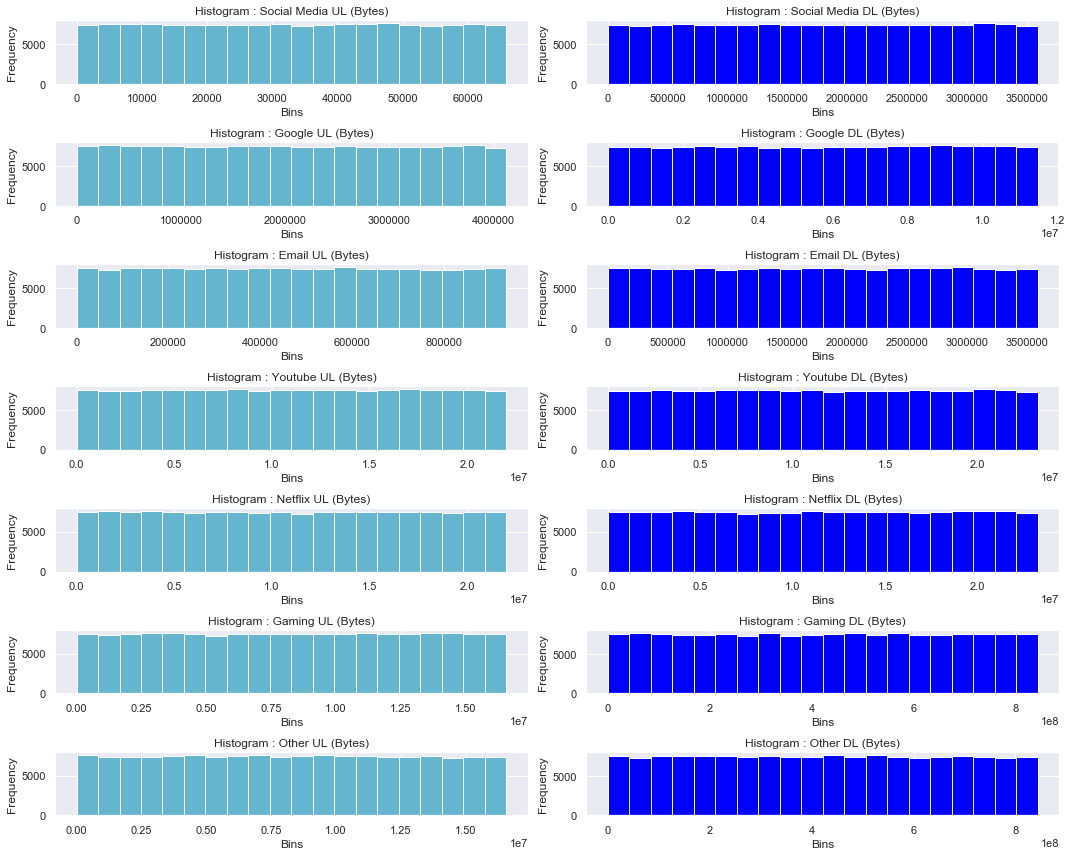

In [22]:
f, ax_arr = plt.subplots(7,2, figsize=(15,12))

# Plot 1.1
ax_arr[0,0].hist(df_user['Social Media UL (Bytes)'], bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Social Media UL (Bytes)')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Frequency')

# Plot 1.2
ax_arr[0,1].hist(df_user['Social Media DL (Bytes)'], bins=20, color='blue')
ax_arr[0,1].set_title('Histogram : Social Media DL (Bytes)')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Frequency')

# Plot 2.1
ax_arr[1,0].hist(df_user['Google UL (Bytes)'], bins=20, color='c')
ax_arr[1,0].set_title('Histogram : Google UL (Bytes)')
ax_arr[1,0].set_xlabel('Bins')
ax_arr[1,0].set_ylabel('Frequency')

# Plot 2.2
ax_arr[1,1].hist(df_user['Google DL (Bytes)'], bins=20, color='blue')
ax_arr[1,1].set_title('Histogram : Google DL (Bytes)')
ax_arr[1,1].set_xlabel('Bins')
ax_arr[1,1].set_ylabel('Frequency')

# Plot 3.1
ax_arr[2,0].hist(df_user['Email UL (Bytes)'], bins=20, color='c')
ax_arr[2,0].set_title('Histogram : Email UL (Bytes)')
ax_arr[2,0].set_xlabel('Bins')
ax_arr[2,0].set_ylabel('Frequency')

# Plot 3.2
ax_arr[2,1].hist(df_user['Email DL (Bytes)'], bins=20, color='blue')
ax_arr[2,1].set_title('Histogram : Email DL (Bytes)')
ax_arr[2,1].set_xlabel('Bins')
ax_arr[2,1].set_ylabel('Frequency')


# Plot 4.1
ax_arr[3,0].hist(df_user['Youtube UL (Bytes)'], bins=20, color='c')
ax_arr[3,0].set_title('Histogram : Youtube UL (Bytes)')
ax_arr[3,0].set_xlabel('Bins')
ax_arr[3,0].set_ylabel('Frequency')

# Plot 4.2
ax_arr[3,1].hist(df_user['Youtube DL (Bytes)'], bins=20, color='blue')
ax_arr[3,1].set_title('Histogram : Youtube DL (Bytes)')
ax_arr[3,1].set_xlabel('Bins')
ax_arr[3,1].set_ylabel('Frequency')

# Plot 5.1
ax_arr[4,0].hist(df_user['Netflix UL (Bytes)'], bins=20, color='c')
ax_arr[4,0].set_title('Histogram : Netflix UL (Bytes)')
ax_arr[4,0].set_xlabel('Bins')
ax_arr[4,0].set_ylabel('Frequency')

# Plot 5.2
ax_arr[4,1].hist(df_user['Netflix DL (Bytes)'], bins=20, color='blue')
ax_arr[4,1].set_title('Histogram : Netflix DL (Bytes)')
ax_arr[4,1].set_xlabel('Bins')
ax_arr[4,1].set_ylabel('Frequency')

# Plot 6.1
ax_arr[5,0].hist(df_user['Gaming UL (Bytes)'], bins=20, color='c')
ax_arr[5,0].set_title('Histogram : Gaming UL (Bytes)')
ax_arr[5,0].set_xlabel('Bins')
ax_arr[5,0].set_ylabel('Frequency')

# Plot 6.2
ax_arr[5,1].hist(df_user['Gaming DL (Bytes)'], bins=20, color='blue')
ax_arr[5,1].set_title('Histogram : Gaming DL (Bytes)')
ax_arr[5,1].set_xlabel('Bins')
ax_arr[5,1].set_ylabel('Frequency')

# Plot 7.1
ax_arr[6,0].hist(df_user['Other UL (Bytes)'], bins=20, color='c')
ax_arr[6,0].set_title('Histogram : Other UL (Bytes)')
ax_arr[6,0].set_xlabel('Bins')
ax_arr[6,0].set_ylabel('Frequency')

# Plot 7.2
ax_arr[6,1].hist(df_user['Other DL (Bytes)'], bins=20, color='blue')
ax_arr[6,1].set_title('Histogram : Other DL (Bytes)')
ax_arr[6,1].set_xlabel('Bins')
ax_arr[6,1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Conclusion:

The histograms used shows uniform distribution of both upload and download data frequencies for all the user data applications displayed above


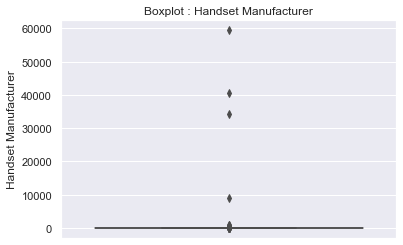

In [23]:
manf_count = df_user['Handset Manufacturer'].value_counts()
sns.boxplot(y=manf_count)
plt.title('Boxplot : Handset Manufacturer')
plt.show()

There is an intresting pattern here. One handset manufacturer has very high value while two have are in the middle. The rest of handset manufacturers have relatively low values.

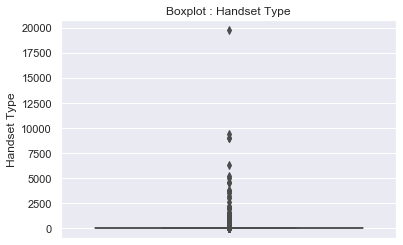

In [24]:
manf_count = df_user['Handset Type'].value_counts()
sns.boxplot(y=manf_count)
plt.title('Boxplot : Handset Type')
plt.show()

Above boxplot exhibits impressive pattern. One handset type seem to have a lot of users while the rest have relatively low number of users 

# Finding the top 10 handsets used by customers

In [25]:
# Getting the top used handets used by the customers
Handset_count = df_user['Handset Type'].value_counts()

# Dropping the undefined handset
Clean_handset = df_user[df_user["Handset Type"] != 'undefined']

Clean_handset = Clean_handset['Handset Type'].value_counts()[:10]

print("Top 10 handset types in relation with the number of its users\n")
print(Clean_handset)

Top 10 handset types in relation with the number of its users

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Samsung Galaxy A5 Sm-A520F       3708
Name: Handset Type, dtype: int64


Text(0, 0.5, 'Frequency')

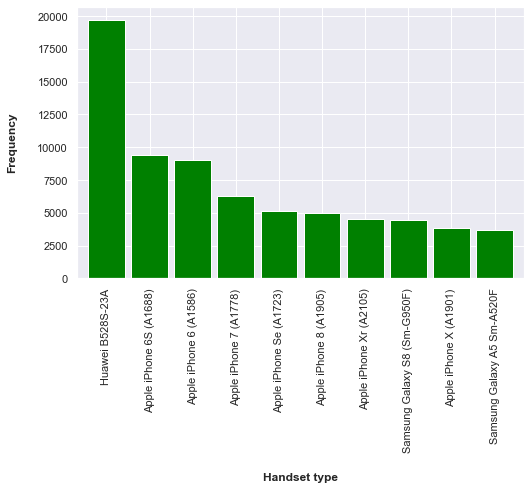

In [26]:
# Visualizing the top 10 handset types
ax = Clean_handset.plot(kind='bar', figsize=(8, 5), color='green', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("Handset type", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

# Finding the top 3 handset manufacturers

In [27]:
Manufacturer_count = df_user['Handset Manufacturer'].value_counts()

# Dropping the undefined handset
good_handset_manuf_values = df[df["Handset Manufacturer"] != 'undefined']

good_handset_manuf_values = good_handset_manuf_values['Handset Manufacturer'].value_counts()[:3]

print("Top three handset manufacturers in relation with its customers\n")
print(good_handset_manuf_values)

Top three handset manufacturers in relation with its customers

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


Text(0, 0.5, 'Number of handsets')

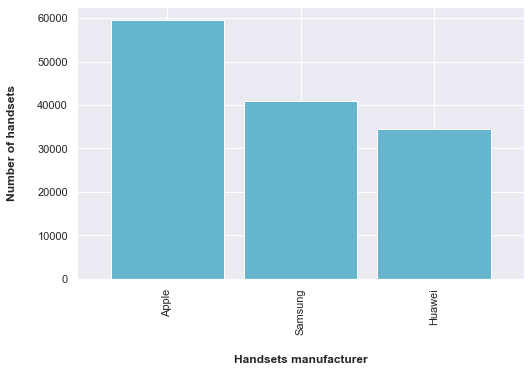

In [28]:
# Visualizing top 3 handset manufacturers
ax = good_handset_manuf_values.plot(kind='bar', figsize=(8, 5), color='c', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("Handsets manufacturer", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Number of handsets", labelpad=20, weight='bold', size=12)

# Identifying top 5 handsets per handset manufacturer

In [29]:
# Picking the top 3 Handset manufacturer's
Handset_top_count = df_user[(df_user['Handset Manufacturer']  == 'Apple') |
                                 (df_user['Handset Manufacturer']  == 'Samsung') |
                                 (df_user['Handset Manufacturer'] == 'Huawei')]
Handset_top_count = Handset_top_count.groupby(['Handset Manufacturer'])['Handset Type'].value_counts()
Handset_top_count

Handset Manufacturer  Handset Type           
Apple                 Apple iPhone 6S (A1688)    9413
                      Apple iPhone 6 (A1586)     9012
                      Apple iPhone 7 (A1778)     6304
                      Apple iPhone Se (A1723)    5176
                      Apple iPhone 8 (A1905)     4985
                                                 ... 
Samsung               Samsung Gt-P5220              1
                      Samsung Gt-S5280              1
                      Samsung Gt-S6310N             1
                      Samsung Metro 350             1
                      Samsung Sm-T235               1
Name: Handset Type, Length: 423, dtype: int64

### Recommendation:

Huawei has the largest number of users for their handset type 'Huawei B528S-23A'. However they're not the dorminant in the market.
Apple has many a number handset types which are being used by a significant number of users. This gives them a large martket share 
compared to other handset manufacturers. It's likely many users prefer using Apple products because of the services they offer. 

## Renaming columns

In [30]:
df_user

,Bearer Id,MSISDN/Number,Start ms,End ms,Dur. (ms).1,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,3.366496e+10,770.0,662.0,1.823653e+09,42.000000,5.000000,23.0,44.0,2.080991e+07,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,3.368185e+10,235.0,606.0,1.365104e+09,65.000000,5.000000,16.0,26.0,2.080991e+07,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,3.376063e+10,1.0,652.0,1.361763e+09,109.795706,17.662883,6.0,9.0,2.080991e+07,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,3.375034e+10,486.0,171.0,1.321510e+09,109.795706,17.662883,44.0,44.0,2.080991e+07,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,3.369980e+10,565.0,954.0,1.089009e+09,109.795706,17.662883,6.0,9.0,2.080991e+07,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,13042425979329300480,3.366865e+10,615.0,407.0,5.958779e+07,313.000000,9.000000,63420.0,1393.0,1.655285e+07,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7277825670196679680,3.365069e+10,451.0,214.0,8.123076e+07,32.000000,0.000000,52.0,65.0,2.080991e+07,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7349883264234609664,3.366345e+10,483.0,187.0,9.797070e+07,27.000000,2.000000,23.0,54.0,2.080991e+07,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,13114483573367300096,3.362189e+10,283.0,810.0,9.824953e+07,43.000000,6.000000,43.0,47.0,2.080991e+07,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [31]:
df_user = df_user.rename(columns = {'Avg RTT DL (ms)': 'Avg_RTT_DL_ms',
                                    'Avg RTT UL (ms)': 'Avg_RTT_UL_ms',
                                    'Avg Bearer TP DL (kbps)': 'Avg_TP_DL_kbps',
                                    'Avg Bearer TP UL (kbps)': 'Avg_TP_UL_kbps',
                                    'TCP DL Retrans. Vol (Bytes)': 'TCP_DL_Retrans_Bytes',
                                    'TCP UL Retrans. Vol (Bytes)': 'TCP_UL_Retrans_Bytes',
                                    'Social Media UL (Bytes)' : 'Social_Media_UL',
                                    'Social Media DL (Bytes)' : 'Social_Media_DL',
                                     'Google DL (Bytes)' : 'Google_DL',
                                     'Google UL (Bytes)' : 'Google_UL',
                                     'Email DL (Bytes)' : 'Email_DL',
                                     'Email UL (Bytes)' : 'Email_UL',
                                     'Netflix DL (Bytes)' : 'Netflix_DL',
                                     'Netflix UL (Bytes)' : 'Netflix_UL',
                                    'Gaming DL (Bytes)' : 'Gaming_DL',
                                    'Gaming UL (Bytes)' : 'Gaming_UL',
                                    'Other DL (Bytes)': 'Other_DL',
                                    'Other UL (Bytes)' : 'Other_UL',
                                    'Youtube DL (Bytes)': 'Youtube_DL',
                                    'Youtube UL (Bytes)' : 'Youtube_UL',
                                    'Total UL (Bytes)' :'Total_UL',
                                    'Total DL (Bytes)' :'Total_DL'})

In [32]:
df_user.eval('Total_Avg_RTT_ms =  Avg_RTT_DL_ms + Avg_RTT_UL_ms',inplace=True)
df_user.eval('Total_Avg_TP_kbps =  Avg_TP_DL_kbps + Avg_TP_UL_kbps',inplace=True)
df_user.eval('Total_TCP_Retrans_Bytes =  TCP_DL_Retrans_Bytes + TCP_UL_Retrans_Bytes',inplace=True)
df_user.eval('Total_SocialMedia =  Social_Media_UL  + Social_Media_DL',inplace=True)
df_user.eval('Total_Google =  Google_DL  + Google_UL',inplace=True)
df_user.eval('Total_Email =  Email_DL  + Email_UL',inplace=True)
df_user.eval('Total_Youtube =  Youtube_DL  + Youtube_UL',inplace=True)
df_user.eval('Total_Netflix =  Netflix_DL  + Netflix_UL',inplace=True)
df_user.eval('Total_Gaming =  Gaming_DL  + Gaming_UL',inplace=True)
df_user.eval('Total_Other =  Other_UL  + Other_DL ',inplace=True)
df_user.eval('Total_DV =  Total_DL  + Total_UL ',inplace=True)

# Objective : User Overview Analysis

# Task 1.1

### 1. Aggregating number of xDR sessions per user

In [33]:
xDR_sessions = df_user.groupby(['MSISDN/Number']).agg({'Bearer Id': 'count'})
xDR_sessions.columns = ['XDR_sessions']
xDR_sessions = xDR_sessions.reset_index()
xDR_sessions

,MSISDN/Number,XDR_sessions
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
...,...,...
106851,3.379000e+10,1
106852,3.379000e+10,1
106853,3.197021e+12,1
106854,3.370000e+14,1


### 2. Aggregating Session duration per use

In [34]:
Session_duration = df_user.groupby(['MSISDN/Number']).agg({'Dur. (ms).1': [sum]})
Session_duration.columns = ['Session_Duration']
Session_duration = Session_duration.reset_index()
Session_duration

,MSISDN/Number,Session_Duration
0,3.360100e+10,116720140.0
1,3.360100e+10,181230963.0
2,3.360100e+10,134969374.0
3,3.360101e+10,49878024.0
4,3.360101e+10,37104453.0
...,...,...
106851,3.379000e+10,8810688.0
106852,3.379000e+10,140988659.0
106853,3.197021e+12,877385325.0
106854,3.370000e+14,253030201.0


### Total download (DL) and upload (UL) data

In [35]:
Total_DL_UL = df_user.groupby(['MSISDN/Number']).agg({'Total_UL': [sum],'Total_DL': [sum],'Total_DV': [sum]})
Total_DL_UL.columns = ['Total_UL','Total_DL','Total_DV']
Total_DL_UL = Total_DL_UL.reset_index()
Total_DL_UL

,MSISDN/Number,Total_UL,Total_DL,Total_DV
0,3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,94280527.0,1.363130e+09,1.457411e+09
...,...,...,...,...
106851,3.379000e+10,26716429.0,6.879252e+08,7.146416e+08
106852,3.379000e+10,35732243.0,4.445751e+08,4.803073e+08
106853,3.197021e+12,37295915.0,1.948281e+08,2.321240e+08
106854,3.370000e+14,56652839.0,5.396350e+08,5.962878e+08


### Total volume (in Bytes) during the session for each application

In [36]:
Total_volume = df_user.groupby(['MSISDN/Number']).agg({'Total_SocialMedia': [sum],'Total_Google': [sum],
                                                     'Total_Email': [sum],'Total_Youtube': [sum],
                                                      'Total_Other': [sum],'Total_Gaming': [sum],
                                                      'Total_Netflix': [sum]})
Total_volume.columns = ['Total_SocialMedia','Total_Google','Total_Email','Total_Youtube','Total_Other','Total_Gaming','Total_Netflix']
Total_volume = Total_volume.reset_index()
Total_volume

,MSISDN/Number,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


## Merging DataFrames

In [37]:
user_df1_merge = pd.merge(xDR_sessions, Session_duration, on='MSISDN/Number')
user_df2_merge = pd.merge(user_df1_merge, Total_DL_UL, on='MSISDN/Number')
user_df2_merge  = pd.merge(user_df2_merge, Total_volume ,on='MSISDN/Number')
user_df2_merge

,MSISDN/Number,XDR_sessions,Session_Duration,Total_UL,Total_DL,Total_DV,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix
0,3.360100e+10,1,116720140.0,36053108.0,8.426375e+08,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,1,181230963.0,36104459.0,1.207552e+08,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,1,134969374.0,39306820.0,5.566597e+08,5.959665e+08,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,1,49878024.0,20327526.0,4.019932e+08,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2,37104453.0,94280527.0,1.363130e+09,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810688.0,26716429.0,6.879252e+08,7.146416e+08,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,1,140988659.0,35732243.0,4.445751e+08,4.803073e+08,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,1,877385325.0,37295915.0,1.948281e+08,2.321240e+08,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,1,253030201.0,56652839.0,5.396350e+08,5.962878e+08,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


# Task 1.2

## Non-Graphical Exploratory data analysis.

In [38]:
user_df2_merge.describe()

,MSISDN/Number,XDR_sessions,Session_Duration,Total_UL,Total_DL,Total_DV,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,4.511474e+10,1.393792,1.461679e+08,5.730942e+07,6.336527e+08,6.909621e+08,2.547967e+06,1.088243e+07,3.148796e+06,3.155840e+07,5.985088e+08,5.997690e+08,3.153833e+07
std,2.889423e+12,0.806022,1.863590e+08,3.565765e+07,4.645551e+08,4.910559e+08,1.908038e+06,7.544861e+06,2.222400e+06,2.129492e+07,4.489221e+08,4.491505e+08,2.128956e+07
min,3.360100e+10,1.000000,7.142988e+06,2.866892e+06,8.827082e+06,3.324901e+07,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.490450e+05,3.063580e+05,1.845690e+05
25%,3.365088e+10,1.000000,7.130834e+07,3.639547e+07,3.148271e+08,3.585499e+08,1.211282e+06,5.942636e+06,1.674481e+06,1.863109e+07,2.855599e+08,2.880631e+08,1.855597e+07
50%,3.366365e+10,1.000000,1.027402e+08,4.679387e+07,5.703677e+08,6.179231e+08,2.303756e+06,9.586153e+06,2.799824e+06,2.680038e+07,5.398323e+08,5.423492e+08,2.671889e+07
75%,3.368344e+10,2.000000,1.728000e+08,6.573199e+07,8.073645e+08,8.574351e+08,3.307509e+06,1.321474e+07,3.847198e+06,3.792798e+07,7.753975e+08,7.773041e+08,3.797696e+07
max,8.823971e+14,18.000000,1.855376e+10,7.295774e+08,8.156743e+09,8.846226e+09,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,8.167878e+09,7.749432e+09,3.995191e+08


### Measures of Central Tendency;
#### Mean: The average of all data points
#### Median: The data point where half of the data lies above and half below it

In [39]:
user_df2_merge.agg({'Session_Duration': ['mean','median'],"XDR_sessions":['mean','median'],
                           'Total_UL': ['mean','median'],'Total_DL': ['mean','median'],
                           'Total_SocialMedia': ['mean','median'],'Total_Google': ['mean','median'],
                            'Total_Email': ['mean','median'],'Total_Youtube': ['mean','median'],
                            'Total_Other': ['mean','median'],'Total_Gaming': ['mean','median'],
                           'Total_Netflix': ['mean','median'], 'Total_DV': ['mean', 'median']})#.unstack()

,Session_Duration,XDR_sessions,Total_UL,Total_DL,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix,Total_DV
mean,1.461679e+08,1.393792,5.730942e+07,6.336527e+08,2.547967e+06,1.088243e+07,3.148796e+06,3.155840e+07,5.985088e+08,5.997690e+08,3.153833e+07,6.909621e+08
median,1.027402e+08,1.000000,4.679387e+07,5.703677e+08,2.303756e+06,9.586153e+06,2.799824e+06,2.680038e+07,5.398323e+08,5.423492e+08,2.671889e+07,6.179231e+08


### Measure of spread

Variance(var) is the mean of the squares of the deviations. <br>
Standard deviation(std) is the square root of the variance <br>
Mean Absolute Deviation(mad) is the arithmetic mean of the absolute values of the deviations. <br>
Min and max helps to find the range between the largest and smallest value <br>

In [40]:
user_df2_merge.agg({'Session_Duration': [min, max, 'mad', 'std','var'],'XDR_sessions':[min, max, 'mad', 'std','var'],
                   'Total_UL': [min, max, 'mad', 'std','var'],'Total_DL': [min, max, 'mad', 'std','var'],
                   'Total_SocialMedia': [min, max, 'mad', 'std','var'],'Total_Google': [min, max, 'mad', 'std','var'],
                    'Total_Email':[min, max, 'mad', 'std','var'],'Total_Youtube': [min, max, 'mad', 'std','var'],
                    'Total_Other': [min, max, 'mad', 'std','var'],'Total_Gaming': [min, max, 'mad', 'std','var'],
                   'Total_Netflix': [min, max, 'mad', 'std','var'], 'Total_DV': [min, max, 'mad', 'std','var']})#.unstack() 

,Session_Duration,XDR_sessions,Total_UL,Total_DL,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix,Total_DV
min,7.142988e+06,1.000000,2.866892e+06,8.827082e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.490450e+05,3.063580e+05,1.845690e+05,3.324901e+07
max,1.855376e+10,18.000000,7.295774e+08,8.156743e+09,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,8.167878e+09,7.749432e+09,3.995191e+08,8.846226e+09
mad,9.037168e+07,0.572917,2.420097e+07,3.280408e+08,1.362683e+06,5.193563e+06,1.534227e+06,1.457490e+07,3.203485e+08,3.196993e+08,1.463285e+07,3.427336e+08
std,1.863590e+08,0.806022,3.565765e+07,4.645551e+08,1.908038e+06,7.544861e+06,2.222400e+06,2.129492e+07,4.489221e+08,4.491505e+08,2.128956e+07,4.910559e+08
var,3.472966e+16,0.649671,1.271468e+15,2.158114e+17,3.640609e+12,5.692493e+13,4.939062e+12,4.534735e+14,2.015311e+17,2.017361e+17,4.532452e+14,2.411359e+17


# Graphical Univariate Analysis

### Feature : Session's duration

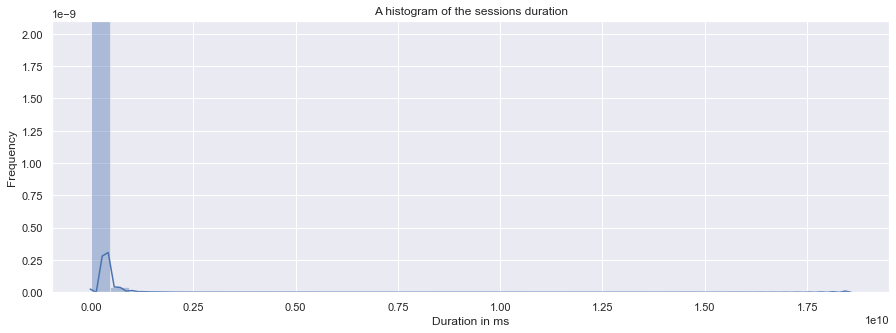

In [41]:
plt.figure(figsize=(15,5))
ax = sns.distplot(user_df2_merge['Session_Duration'],bins = 40)
ax.set(xlabel="Duration in ms", ylabel = "Frequency")
plt.title('A histogram of the sessions duration')
#plt.savefig("Session_duration_graphical_analysis.png")
plt.show()

From the graph, most of the sessions have a shorter duration.

### XDR Sessions

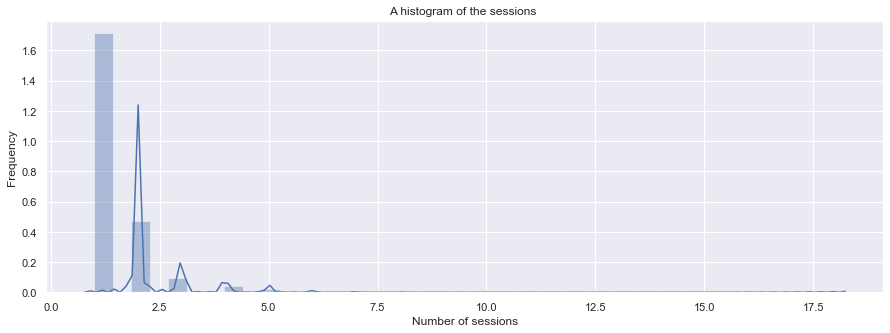

In [42]:
plt.figure(figsize=(15,5))
ax = sns.distplot(user_df2_merge['XDR_sessions'],bins = 40)
ax.set(xlabel="Number of sessions", ylabel = "Frequency")
plt.title('A histogram of the sessions ')
#plt.savefig("XDR_sessions_univariate.png")
plt.show()

### Total Upload (DL) in bytes

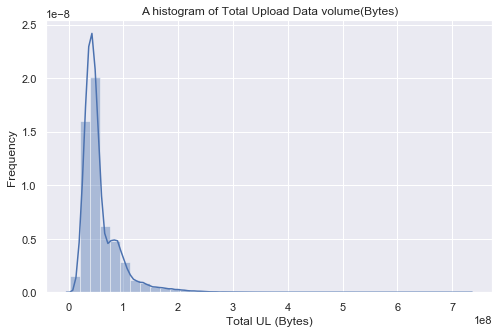

In [43]:
plt.figure(figsize=(8,5))
ax = sns.distplot(user_df2_merge['Total_UL'],bins = 40)
ax.set(xlabel="Total UL (Bytes)", ylabel = "Frequency")
plt.title('A histogram of Total Upload Data volume(Bytes)')
#plt.savefig("Total_Upload_volume_univariate(Bytes).png")
plt.show()

### Total Download (DL) in bytes

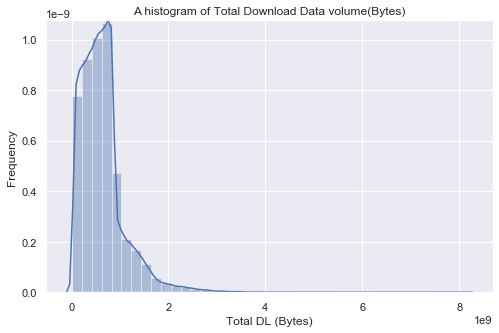

In [44]:
plt.figure(figsize=(8,5))
ax = sns.distplot(user_df2_merge['Total_DL'],bins = 40)
ax.set(xlabel="Total DL (Bytes)", ylabel = "Frequency")
plt.title('A histogram of Total Download Data volume(Bytes)')
#plt.savefig("Total_Download_volume(Bytes)_uni.png")

plt.show()

### Total Social Media (Data Volume) in bytes

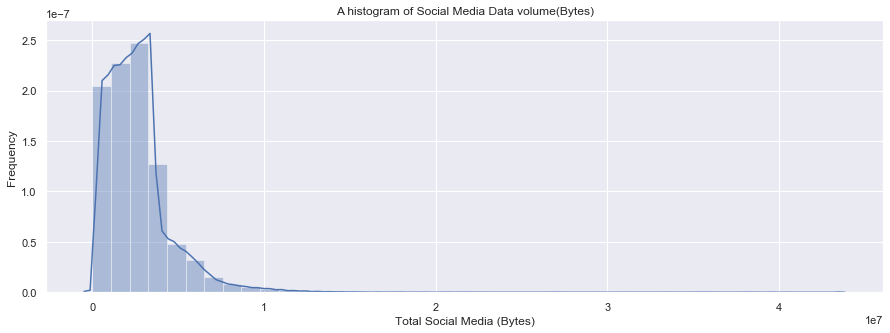

In [45]:
plt.figure(figsize=(15,5))
ax = sns.distplot(user_df2_merge['Total_SocialMedia'],bins = 40)
ax.set(xlabel="Total Social Media (Bytes)", ylabel = "Frequency")
plt.title('A histogram of Social Media Data volume(Bytes)')
#plt.savefig("Total_Social_media_volume(Bytes)_uni.png")
plt.show()

### Total_Google (Data Volume) in bytes

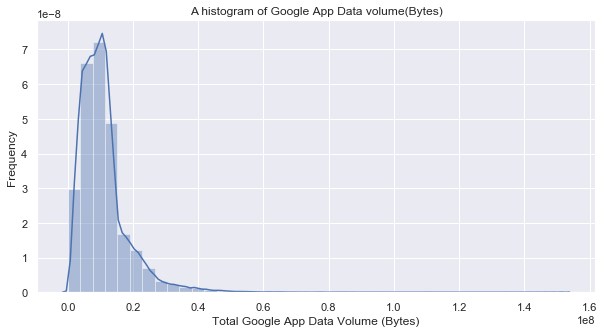

In [46]:
plt.figure(figsize=(10,5))
ax = sns.distplot(user_df2_merge['Total_Google'],bins = 40)
ax.set(xlabel="Total Google App Data Volume (Bytes)", ylabel = "Frequency")
plt.title('A histogram of Google App Data volume(Bytes)')
#plt.savefig("Total_Google_volume(Bytes)_uni.png")
plt.show()

### Total email (Data Volume) in bytes

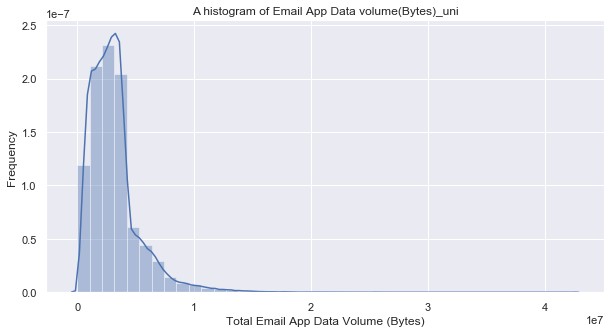

In [47]:
plt.figure(figsize=(10,5))
ax = sns.distplot(user_df2_merge['Total_Email'],bins = 40)
ax.set(xlabel="Total Email App Data Volume (Bytes)", ylabel = "Frequency")
plt.title('A histogram of Email App Data volume(Bytes)_uni')
#plt.savefig("Total_Email_volume(Bytes).png")
plt.show()

### Total Netflix (Data Volume) in bytes

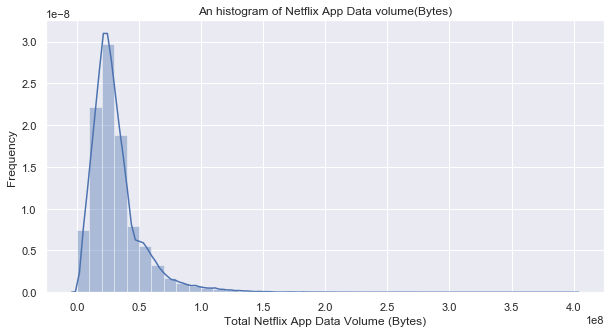

In [48]:
plt.figure(figsize=(10,5))
ax = sns.distplot(user_df2_merge['Total_Netflix'],bins = 40)
ax.set(xlabel="Total Netflix App Data Volume (Bytes)", ylabel = "Frequency")
plt.title('An histogram of Netflix App Data volume(Bytes)')
#plt.savefig("Total_Netflix_volume(Bytes)_uni.png")
plt.show()

### Total Gaming (Data Volume) in bytes

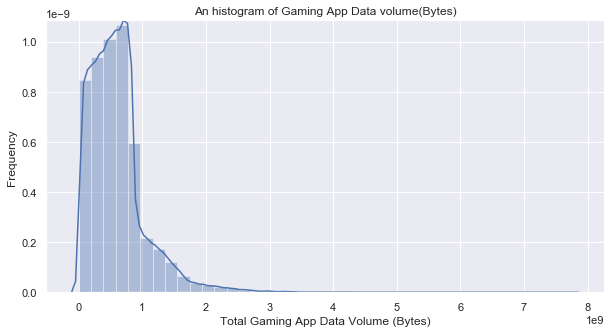

In [49]:
plt.figure(figsize=(10,5))
ax = sns.distplot(user_df2_merge['Total_Gaming'],bins = 40)
ax.set(xlabel="Total Gaming App Data Volume (Bytes)", ylabel = "Frequency")
plt.title('An histogram of Gaming App Data volume(Bytes)')
#plt.savefig("Total_Gaming_volume(Bytes)_uni.png")
plt.show()

### Total Youtube (Data Volume) in bytes

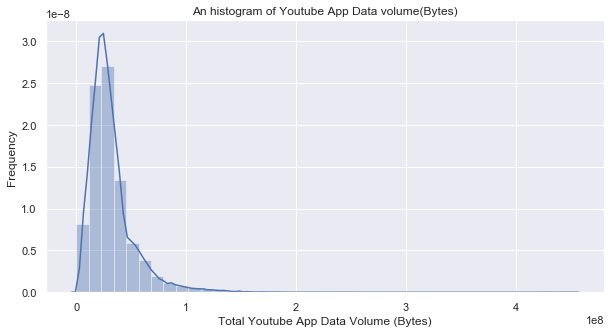

In [50]:
plt.figure(figsize=(10,5))
ax = sns.distplot(user_df2_merge['Total_Youtube'],bins = 40)
ax.set(xlabel="Total Youtube App Data Volume (Bytes)", ylabel = "Frequency")
plt.title('An histogram of Youtube App Data volume(Bytes)')
#plt.savefig("Total_Youtube_volume(Bytes)_uni.png")
plt.show()

In [51]:
user_df2_merge.columns

Index(['MSISDN/Number', 'XDR_sessions', 'Session_Duration', 'Total_UL',
       'Total_DL', 'Total_DV', 'Total_SocialMedia', 'Total_Google',
       'Total_Email', 'Total_Youtube', 'Total_Other', 'Total_Gaming',
       'Total_Netflix'],
      dtype='object')

# Bivariate Analysis

<Figure size 720x360 with 0 Axes>

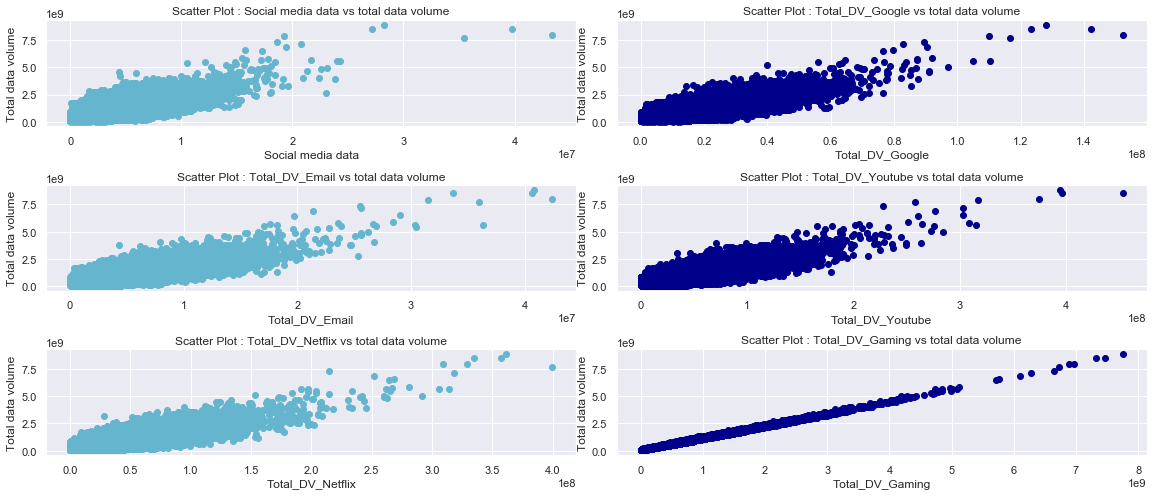

In [52]:
plt.figure(figsize=(10,5))

f, ax_arr = plt.subplots(3,2, figsize=(16,7))
# Social data plot
ax_arr[0,0].scatter(user_df2_merge.Total_SocialMedia, user_df2_merge.Total_DV, color='c')
ax_arr[0,0].set_title('Scatter Plot : Social media data vs total data volume')
ax_arr[0,0].set_xlabel('Social media data')
ax_arr[0,0].set_ylabel('Total data volume')

# Google data plot
ax_arr[0,1].scatter(user_df2_merge.Total_Google, user_df2_merge.Total_DV, color='darkblue')
ax_arr[0,1].set_title('Scatter Plot : Total_DV_Google vs total data volume')
ax_arr[0,1].set_xlabel('Total_DV_Google')
ax_arr[0,1].set_ylabel('Total data volume')

# Email data plot
ax_arr[1,0].scatter(user_df2_merge.Total_Email, user_df2_merge.Total_DV, color='c')
ax_arr[1,0].set_title('Scatter Plot : Total_DV_Email vs total data volume')
ax_arr[1,0].set_xlabel('Total_DV_Email')
ax_arr[1,0].set_ylabel('Total data volume')

# Youtube data plot
ax_arr[1,1].scatter(user_df2_merge.Total_Youtube, user_df2_merge.Total_DV, color='darkblue')
ax_arr[1,1].set_title('Scatter Plot : Total_DV_Youtube vs total data volume')
ax_arr[1,1].set_xlabel('Total_DV_Youtube')
ax_arr[1,1].set_ylabel('Total data volume')

# Netflix data plot
ax_arr[2,0].scatter(user_df2_merge.Total_Netflix, user_df2_merge.Total_DV, color='c')
ax_arr[2,0].set_title('Scatter Plot : Total_DV_Netflix vs total data volume')
ax_arr[2,0].set_xlabel('Total_DV_Netflix')
ax_arr[2,0].set_ylabel('Total data volume')

# Gaming data plot
ax_arr[2,1].scatter(user_df2_merge.Total_Gaming, user_df2_merge.Total_DV, color='darkblue')
ax_arr[2,1].set_title('Scatter Plot : Total_DV_Gaming vs total data volume')
ax_arr[2,1].set_xlabel('Total_DV_Gaming')
ax_arr[2,1].set_ylabel('Total data volume')

# plt.savefig("bivariate.png")

plt.tight_layout()

plt.show()

## Unit conversion

In [53]:
user_df2_merge

,MSISDN/Number,XDR_sessions,Session_Duration,Total_UL,Total_DL,Total_DV,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix
0,3.360100e+10,1,116720140.0,36053108.0,8.426375e+08,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,1,181230963.0,36104459.0,1.207552e+08,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,1,134969374.0,39306820.0,5.566597e+08,5.959665e+08,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,1,49878024.0,20327526.0,4.019932e+08,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2,37104453.0,94280527.0,1.363130e+09,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810688.0,26716429.0,6.879252e+08,7.146416e+08,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,1,140988659.0,35732243.0,4.445751e+08,4.803073e+08,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,1,877385325.0,37295915.0,1.948281e+08,2.321240e+08,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,1,253030201.0,56652839.0,5.396350e+08,5.962878e+08,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


In [54]:
#converting the session duration into minutes.

#A minute is 3600000 ms.
user_df2_merge.eval('Session_Duration_hrs = Session_Duration / 3600000',inplace = True )

#Converting Total UL data bytes into GB's
user_df2_merge.eval('Total_UL_GB = Total_UL / 1000000000',inplace = True )

#Converting Total UL data bytes into GB's
user_df2_merge.eval('Total_DL_GB = Total_DL / 1000000000',inplace = True )

#Converting Total_SocialMedia data bytes into GB's
user_df2_merge.eval('Total_SocialMedia_GB = Total_SocialMedia / 1000000000',inplace = True )

#Converting Total_Google data bytes into GB's
user_df2_merge.eval('Total_Google_GB = Total_Google / 1000000000',inplace = True )

#Converting Total_Email data bytes into GB's
user_df2_merge.eval('Total_Email_GB = Total_Email / 1000000000',inplace = True )

#Converting Total_Youtube data bytes into GB's
user_df2_merge.eval('Total_Youtube_GB = Total_Youtube / 1000000000',inplace = True )

#Converting Total_Other data bytes into GB's
user_df2_merge.eval('Total_Other_GB = Total_Other / 1000000000',inplace = True )

#Converting Total_Gaming data bytes into GB's
user_df2_merge.eval('Total_Gaming_GB = Total_Gaming / 1000000000',inplace = True )

#Converting Total_Netflix data bytes into GB's
user_df2_merge.eval('Total_Netflix_GB = Total_Netflix / 1000000000',inplace = True )

#Converting Total data volume bytes into GB's
#A GB is 1000000000 bytes.
user_df2_merge.eval('Total_DV_GB = Total_DV / 1000000000',inplace = True )
user_df3_merge =user_df2_merge[["MSISDN/Number","XDR_sessions","Session_Duration_hrs","Total_DV_GB"]]

## Variable transformations

In [62]:
# sorting the dataframe using 'Session_Duration' column
sorted_df =  user_df3_merge.sort_values(by='Session_Duration_hrs', ascending=False)
sorted_df = sorted_df.reset_index(drop=True)
sorted_df = sorted_df.head(50)
Decile = ["First_decile","First_decile","First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",	"First_decile",
            "Second_decile","Second_decile","Second_decile","Second_decile","Second_decile","Second_decile","Second_decile","Second_decile","Second_decile","Second_decile",
            "Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",	"Third_decile",
            "Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",	"Forth_decile",
            "Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",	"Fifth_decile",
            ]
sorted_df['Decile'] = Decile
#import numpy as np    
#sorted_df['Decile'] = np.where((sorted_df.index<10) |(sorted_df.index>+10) , 'first_decile', 'good')
sorted_df = sorted_df.groupby(['Decile']).agg({'Total_DV_GB': [sum]})
sorted_df.columns = ["Total_DV_GB"]
import dataframe_image as dfi
sorted_df  = pd.DataFrame(sorted_df)   
dfi.export(sorted_df, 'Decile.png')

In [63]:
sorted_df = sorted_df['Total_DV_GB'].sort_values(ascending=False)
sorted_df

Decile
First_decile     63.841375
Second_decile    49.147664
Third_decile     44.907065
Fifth_decile     42.662578
Forth_decile     31.702135
Name: Total_DV_GB, dtype: float64

## Correlation Analysis

In [64]:
user_df2_merge.columns

Index(['MSISDN/Number', 'XDR_sessions', 'Session_Duration', 'Total_UL',
       'Total_DL', 'Total_DV', 'Total_SocialMedia', 'Total_Google',
       'Total_Email', 'Total_Youtube', 'Total_Other', 'Total_Gaming',
       'Total_Netflix', 'Session_Duration_hrs', 'Total_UL_GB', 'Total_DL_GB',
       'Total_SocialMedia_GB', 'Total_Google_GB', 'Total_Email_GB',
       'Total_Youtube_GB', 'Total_Other_GB', 'Total_Gaming_GB',
       'Total_Netflix_GB', 'Total_DV_GB'],
      dtype='object')

In [67]:
correlation_df = user_df2_merge[['Total_SocialMedia_GB', 'Total_Google_GB', 'Total_Email_GB', 'Total_Youtube_GB',
                                'Total_Gaming_GB', 'Total_Netflix_GB', 'Total_Other_GB', 'Total_DV_GB']]

In [68]:
corr_table = correlation_df.iloc[:, :].corr()

In [69]:
corr_table

,Total_SocialMedia_GB,Total_Google_GB,Total_Email_GB,Total_Youtube_GB,Total_Gaming_GB,Total_Netflix_GB,Total_Other_GB,Total_DV_GB
Total_SocialMedia_GB,1.000000,0.643071,0.634016,0.659545,0.590048,0.659974,0.591727,0.623957
Total_Google_GB,0.643071,1.000000,0.688460,0.718539,0.642037,0.716191,0.642608,0.681745
Total_Email_GB,0.634016,0.688460,1.000000,0.704632,0.627474,0.705466,0.631024,0.663768
Total_Youtube_GB,0.659545,0.718539,0.704632,1.000000,0.657408,0.738445,0.660380,0.705072
Total_Gaming_GB,0.590048,0.642037,0.627474,0.657408,1.000000,0.657408,0.586394,0.997001
Total_Netflix_GB,0.659974,0.716191,0.705466,0.738445,0.657408,1.000000,0.655831,0.705061
Total_Other_GB,0.591727,0.642608,0.631024,0.660380,0.586394,0.655831,1.000000,0.619037
Total_DV_GB,0.623957,0.681745,0.663768,0.705072,0.997001,0.705061,0.619037,1.000000


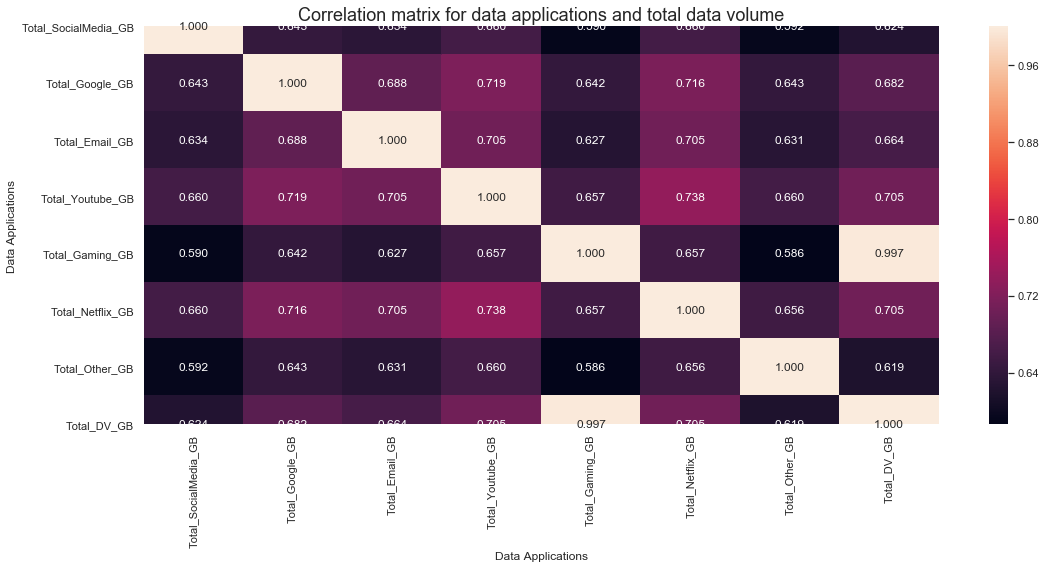

In [70]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr_table, annot=True,
                fmt=".3f",
                annot_kws={'size':12})
plt.xlabel('Data Applications')
plt.ylabel('Data Applications')
plt.title('Correlation matrix for data applications and total data volume', fontsize=18)
# plt.savefig("correlation_analysis.png")
plt.tight_layout()
plt.show()

## Dimensionality Reduction

In [74]:
dimensionality_df =  user_df2_merge[['Total_SocialMedia_GB', 'Total_Google_GB', 'Total_Email_GB',
                                      'Total_Youtube_GB','Total_Other_GB', 'Total_Gaming_GB', 
                                     'Total_Netflix_GB', 'Total_DL_GB', 'Total_UL_GB', 'Total_DV_GB',]]

In [75]:
dimensionality_df

,Total_SocialMedia_GB,Total_Google_GB,Total_Email_GB,Total_Youtube_GB,Total_Other_GB,Total_Gaming_GB,Total_Netflix_GB,Total_DL_GB,Total_UL_GB,Total_DV_GB
0,0.002232,0.004389,0.001331,0.021625,0.386571,0.812459,0.027181,0.842637,0.036053,0.878691
1,0.002661,0.005335,0.003308,0.012432,0.281710,0.119750,0.011222,0.120755,0.036104,0.156860
2,0.003196,0.003443,0.003205,0.021334,0.501694,0.538828,0.019354,0.556660,0.039307,0.595966
3,0.000280,0.009678,0.002285,0.006977,0.035280,0.391126,0.001942,0.401993,0.020328,0.422321
4,0.002913,0.018500,0.003305,0.041533,0.804804,1.314798,0.049202,1.363130,0.094281,1.457411
...,...,...,...,...,...,...,...,...,...,...
106851,0.000300,0.007531,0.001007,0.026648,0.295283,0.660361,0.014903,0.687925,0.026716,0.714642
106852,0.000499,0.005430,0.002514,0.019852,0.211115,0.437003,0.008531,0.444575,0.035732,0.480307
106853,0.000715,0.010439,0.001521,0.011960,0.470526,0.178049,0.026592,0.194828,0.037296,0.232124
106854,0.000522,0.009831,0.003319,0.036735,0.149188,0.510143,0.030905,0.539635,0.056653,0.596288


In [76]:
# standardizing data
columns_to_standardize = ['Total_DL_GB', 'Total_UL_GB', 'Total_DV_GB',
                                    'Total_SocialMedia_GB', 'Total_Google_GB', 'Total_Email_GB', 'Total_Youtube_GB',
                                    'Total_Other_GB', 'Total_Gaming_GB', 'Total_Netflix_GB']

x = dimensionality_df[columns_to_standardize].values

x_standardized = StandardScaler().fit_transform(x)

df_temp = pd.DataFrame(x_standardized, columns=columns_to_standardize, index = dimensionality_df.index)

dimensionality_df[columns_to_standardize] = df_temp
dimensionality_df.head() 

,Total_SocialMedia_GB,Total_Google_GB,Total_Email_GB,Total_Youtube_GB,Total_Other_GB,Total_Gaming_GB,Total_Netflix_GB,Total_DL_GB,Total_UL_GB,Total_DV_GB
0,-0.165528,-0.860647,-0.817784,-0.466491,-0.472106,0.473540,-0.204672,0.449862,-0.596125,0.382297
1,0.059013,-0.735282,0.071538,-0.898161,-0.705691,-1.068731,-0.954302,-1.104067,-0.594685,-1.087666
2,0.339437,-0.986015,0.025461,-0.480156,-0.215662,-0.135682,-0.572322,-0.165736,-0.504876,-0.193453
3,-1.188490,-0.159572,-0.388827,-1.154322,-1.254631,-0.464530,-1.390183,-0.498672,-1.037143,-0.547071
4,0.191074,1.009590,0.070498,0.468405,0.459538,1.591966,0.829678,1.570279,1.036840,1.560825


In [77]:
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(dimensionality_df)
pca.shape

(106856, 5)

In [78]:
print('Explained variation per principal component: {}'.format(pcamodel.explained_variance_ratio_))

Explained variation per principal component: [0.73378578 0.08960066 0.04083552 0.03876431 0.03248372]


In [79]:
pcamodel.explained_variance_

array([7.33792652, 0.89601496, 0.40835902, 0.38764677, 0.32484023])

In [80]:
pcamodel.explained_variance_ratio_

array([0.73378578, 0.08960066, 0.04083552, 0.03876431, 0.03248372])

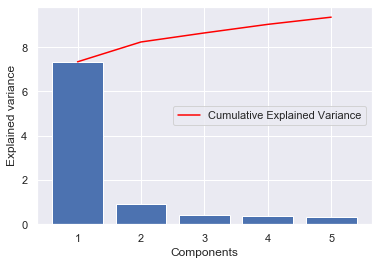

In [81]:
# explained_variance plot

plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='left')

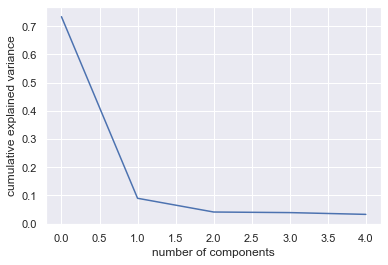

In [82]:
# explained_variance_ratio_ plot

plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


### Scree plot

A plot of eigen values (explained_variance_) for each of the components

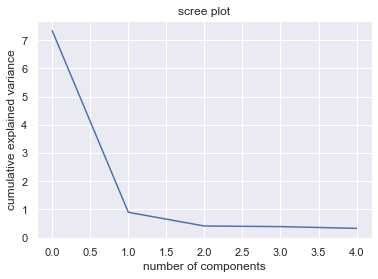

In [87]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('scree plot')
# plt.savefig("pca_scree_plot.png")
plt.show()

### Scatter plot

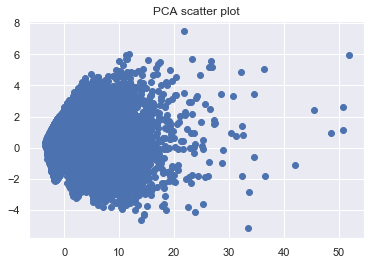

In [88]:
plt.scatter(pca[:,0], pca[:,1])
plt.title('PCA scatter plot')
# plt.savefig("pca_scatter_plot.png")
plt.show()

# Objective : User Engagement Analysis

# Task 2.1

#### Selecting variables of interest

In [89]:
user_df4 = user_df2_merge[['MSISDN/Number', 'XDR_sessions', 'Session_Duration_hrs', 'Total_DV_GB']]

### Aggregating sessions frequency per customer

In [90]:
sorted_duration_df = user_df4.sort_values(by=['XDR_sessions'], ascending=False)

In [92]:
session_frequency_per_user = sorted_duration_df[:10]

In [93]:
session_frequency_per_user

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB
13526,3.362632e+10,18,2442.204633,7.971167
13180,3.362578e+10,17,5153.823191,8.499621
6437,3.361489e+10,17,2768.584933,8.846226
37052,3.365973e+10,16,1120.954514,7.705863
92923,3.376054e+10,15,2577.622778,8.514774
76363,3.367588e+10,15,1351.653841,7.891111
65118,3.366716e+10,13,2429.145006,5.618394
13994,3.362708e+10,12,1306.533131,5.754731
1279,3.360452e+10,12,1446.665392,5.487855
92577,3.376041e+10,12,1478.242721,7.132371


In [94]:
dfi.export(session_frequency_per_user, 'top10users_per_session_frequency.png')

### Aggregating sessions duration per customer

In [95]:
sorted_session_df = user_df4.sort_values(by=['Session_Duration_hrs'], ascending=False)

In [97]:
session_duration_per_user = sorted_session_df[:10]

In [98]:
session_duration_per_user

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB
13180,3.362578e+10,17,5153.823191,8.499621
6437,3.361489e+10,17,2768.584933,8.846226
92923,3.376054e+10,15,2577.622778,8.514774
13526,3.362632e+10,18,2442.204633,7.971167
65118,3.366716e+10,13,2429.145006,5.618394
50281,3.366284e+10,9,1837.298413,4.000098
57160,3.366469e+10,9,1746.871047,5.682007
666,3.360313e+10,12,1746.602079,4.976195
66029,3.366746e+10,6,1569.412599,2.600522
92577,3.376041e+10,12,1478.242721,7.132371


In [99]:
dfi.export(session_duration_per_user, 'top10users_per_session_duration.png')

### Aggregating total data volume per customer

In [100]:
sorted_data_volume_df = user_df4.sort_values(by=['Total_DV_GB'], ascending=False)

In [102]:
data_volume_per_user = sorted_data_volume_df[:10]

In [103]:
data_volume_per_user 

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB
6437,3.361489e+10,17,2768.584933,8.846226
92923,3.376054e+10,15,2577.622778,8.514774
13180,3.362578e+10,17,5153.823191,8.499621
13526,3.362632e+10,18,2442.204633,7.971167
76363,3.367588e+10,15,1351.653841,7.891111
37052,3.365973e+10,16,1120.954514,7.705863
63028,3.366646e+10,11,1260.212141,7.308501
92577,3.376041e+10,12,1478.242721,7.132371
57241,3.366471e+10,11,813.275076,6.872018
86455,3.369879e+10,11,1435.870532,6.540899


In [104]:
dfi.export(data_volume_per_user, 'top10users_per_data_volume.png')

### Normalizing engagement metric

In [105]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

user_df5 = user_df4[["MSISDN/Number","XDR_sessions","Session_Duration_hrs","Total_DV_GB"]]

column_names_to_normalize = ['XDR_sessions','Session_Duration_hrs',	'Total_DV_GB']

x = user_df5[column_names_to_normalize].values

x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = user_df5.index)

user_df5[column_names_to_normalize] = df_temp
user_df5.head()  

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB
0,3.360100e+10,0.000000,0.005908,0.095931
1,3.360100e+10,0.000000,0.009387,0.014026
2,3.360100e+10,0.000000,0.006892,0.063851
3,3.360101e+10,0.000000,0.002304,0.044148
4,3.360101e+10,0.058824,0.001615,0.161598


#### K-mean clustering

In [106]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=22)

In [107]:
user_df5_predicted = kmeans.fit_predict(user_df5[['XDR_sessions', 'Session_Duration_hrs', 'Total_DV_GB']])

In [108]:
user_df5_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
user_df5

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB
0,3.360100e+10,0.000000,0.005908,0.095931
1,3.360100e+10,0.000000,0.009387,0.014026
2,3.360100e+10,0.000000,0.006892,0.063851
3,3.360101e+10,0.000000,0.002304,0.044148
4,3.360101e+10,0.058824,0.001615,0.161598
...,...,...,...,...
106851,3.379000e+10,0.000000,0.000090,0.077317
106852,3.379000e+10,0.000000,0.007217,0.050727
106853,3.197021e+12,0.000000,0.046922,0.022566
106854,3.370000e+14,0.000000,0.013258,0.063887


In [110]:
user_df4_predicted = kmeans.fit_predict(user_df4[['MSISDN/Number', 'XDR_sessions', 'Session_Duration_hrs', 'Total_DV_GB']])

In [111]:
user_df4['Clusters'] = user_df4_predicted

In [112]:
user_df4

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB,Clusters
0,3.360100e+10,1,32.422261,0.878691,0
1,3.360100e+10,1,50.341934,0.156860,0
2,3.360100e+10,1,37.491493,0.595966,0
3,3.360101e+10,1,13.855007,0.422321,0
4,3.360101e+10,2,10.306792,1.457411,0
...,...,...,...,...,...
106851,3.379000e+10,1,2.447413,0.714642,0
106852,3.379000e+10,1,39.163516,0.480307,0
106853,3.197021e+12,1,243.718146,0.232124,0
106854,3.370000e+14,1,70.286167,0.596288,2


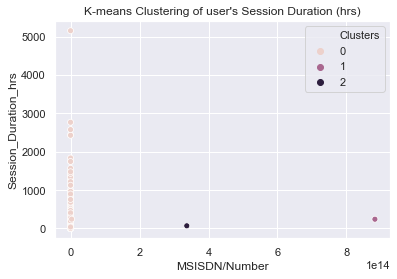

In [113]:
sns.scatterplot(x=user_df4["MSISDN/Number"], y=user_df4["Session_Duration_hrs"], hue=user_df4["Clusters"])
plt.title("K-means Clustering of user's Session Duration (hrs)")

plt.show()

### Computing minimum, maximum, average and total non-normalized metrics for each cluster

In [114]:
user_df6 = user_df4.groupby(["Clusters"]).agg({"XDR_sessions": [sum, min, max, "mean"], 
                                               "Session_Duration_hrs": [sum, min, max, "mean"],
                                               "Total_DV_GB": [sum, min, max, "mean"]})

In [115]:
user_df6.columns = [["Total_XDR_Sessions", "Min_XDR_Sessions", "Max_XDR_Sessions", "Avg_XDR_Sessions",
                   "Total_Session_Duration(HRS)", "Min_Session_Duration(HRS)", "Max_Session_Duration(HRS)",
                   "Avg_Session_Duration(HRS)", "Total_DV_GB", "Min_DV_GB", "Max_DV_GB", "Avg_DV_GB"]]

In [116]:
user_df6 = user_df6.reset_index()

In [117]:
user_df6

,Clusters,Total_XDR_Sessions,Min_XDR_Sessions,Max_XDR_Sessions,Avg_XDR_Sessions,Total_Session_Duration(HRS),Min_Session_Duration(HRS),Max_Session_Duration(HRS),Avg_Session_Duration(HRS),Total_DV_GB,Min_DV_GB,Max_DV_GB,Avg_DV_GB
0,0,148933,1,18,1.393799,4.338277e+06,1.984163,5153.823191,40.600040,73832.711070,0.033249,8.846226,0.690968
1,1,1,1,1,1.000000,2.416234e+02,241.623389,241.623389,241.623389,0.139154,0.139154,0.139154,0.139154
2,2,1,1,1,1.000000,7.028617e+01,70.286167,70.286167,70.286167,0.596288,0.596288,0.596288,0.596288


In [ ]:
# plotting

### Aggregating user total traffic per application

In [118]:
total_traffic_per_application = df_user.groupby(['MSISDN/Number']).agg({'Total_SocialMedia': [sum],'Total_Google': [sum],
                                                     'Total_Email': [sum],'Total_Youtube': [sum],
                                                      'Total_Other': [sum],'Total_Gaming': [sum],
                                                      'Total_Netflix': [sum]})
total_traffic_per_application.columns = ['Total_SocialMedia','Total_Google','Total_Email','Total_Youtube','Total_Other','Total_Gaming','Total_Netflix']
total_traffic_per_application = total_traffic_per_application.reset_index()
total_traffic_per_application

,MSISDN/Number,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Other,Total_Gaming,Total_Netflix
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,386570872.0,8.124587e+08,27180981.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,281710071.0,1.197501e+08,11221763.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,501693672.0,5.388277e+08,19353900.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,35279702.0,3.911261e+08,1942092.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,804804484.0,1.314798e+09,49201724.0
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,295282817.0,6.603614e+08,14902538.0
106852,3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,211115113.0,4.370033e+08,8531060.0
106853,3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,470526473.0,1.780487e+08,26592300.0
106854,3.370000e+14,521566.0,9830617.0,3318582.0,36734940.0,149188439.0,5.101427e+08,30905042.0


In [119]:
total_traffic_social_media = total_traffic_per_application.sort_values(by='Total_SocialMedia',ascending = False)
total_traffic_social_media = total_traffic_social_media['MSISDN/Number'].head(10)
total_traffic_social_media = pd.DataFrame(total_traffic_social_media)
total_traffic_social_media.columns = ['Social media users']
total_traffic_social_media = total_traffic_social_media.reset_index(drop = True)
total_traffic_google = total_traffic_per_application.sort_values(by='Total_Google',ascending = False)
total_traffic_google = total_traffic_google['MSISDN/Number'].head(10)
total_traffic_google = pd.DataFrame(total_traffic_google)
total_traffic_google.columns = ['Google users']
total_traffic_google = total_traffic_google.reset_index(drop = True)
total_traffic_email = total_traffic_per_application.sort_values(by='Total_Email',ascending = False)
total_traffic_email = total_traffic_email['MSISDN/Number'].head(10)
total_traffic_email = pd.DataFrame(total_traffic_email)
total_traffic_email.columns = ['email user']
total_traffic_email = total_traffic_email.reset_index(drop = True)
total_traffic_youtube = total_traffic_per_application.sort_values(by='Total_Youtube',ascending = False)
total_traffic_youtube = total_traffic_youtube['MSISDN/Number'].head(10)
total_traffic_youtube = pd.DataFrame(total_traffic_youtube)
total_traffic_youtube.columns = ['Youtube users']
total_traffic_youtube = total_traffic_youtube.reset_index(drop = True)
total_traffic_other = total_traffic_per_application.sort_values(by = 'Total_Other',ascending = False)
total_traffic_other = total_traffic_other['MSISDN/Number'].head(10)
total_traffic_other = pd.DataFrame(total_traffic_other)
total_traffic_other.columns = ['Other app users']
total_traffic_other = total_traffic_other.reset_index(drop = True)
total_traffic_gaming = total_traffic_per_application.sort_values(by = 'Total_Gaming',ascending = False)
total_traffic_gaming = total_traffic_gaming['MSISDN/Number'].head(10)
total_traffic_gaming = pd.DataFrame(total_traffic_gaming)
total_traffic_gaming.columns = ['Gaming app user']
total_traffic_gaming = total_traffic_gaming.reset_index(drop = True)
total_traffic_netflix = total_traffic_per_application.sort_values(by = 'Total_Netflix',ascending = False)
total_traffic_netflix = total_traffic_netflix['MSISDN/Number'].head(10)
total_traffic_netflix = pd.DataFrame(total_traffic_netflix)
total_traffic_netflix.columns = ['Netflix app users']
total_traffic_netflix = total_traffic_netflix.reset_index(drop = True)
###Concatenating.
#### Merging the dataframe.
merged_totaltraffic = pd.concat([total_traffic_social_media,total_traffic_google,total_traffic_email,
                                 total_traffic_youtube,total_traffic_other,total_traffic_gaming, 
                                 total_traffic_netflix],axis = 1)
merged_totaltraffic   

,Social media users,Google users,email user,Youtube users,Other app users,Gaming app user,Netflix app users
0,3.362632e+10,3.362632e+10,3.362632e+10,3.362578e+10,3.362632e+10,3.361489e+10,3.365973e+10
1,3.376054e+10,3.362578e+10,3.361489e+10,3.376054e+10,3.361489e+10,3.376054e+10,3.361489e+10
2,3.365973e+10,3.361489e+10,3.362578e+10,3.361489e+10,3.367588e+10,3.362578e+10,3.362578e+10
3,3.361489e+10,3.376054e+10,3.378632e+10,3.362632e+10,3.362578e+10,3.367588e+10,3.376054e+10
4,3.362578e+10,3.365973e+10,3.365973e+10,3.367588e+10,3.360313e+10,3.362632e+10,3.362632e+10
5,3.366716e+10,3.378632e+10,3.376054e+10,3.366716e+10,3.365973e+10,3.365973e+10,3.376041e+10
6,3.378632e+10,3.367588e+10,3.367588e+10,3.362708e+10,3.362695e+10,3.366646e+10,3.366716e+10
7,3.366907e+10,3.366716e+10,3.366546e+10,3.376041e+10,3.362708e+10,3.376041e+10,3.367588e+10
8,3.360313e+10,3.376127e+10,3.366716e+10,3.369879e+10,3.376127e+10,3.366471e+10,3.378632e+10
9,3.365849e+10,3.369876e+10,3.369879e+10,3.360313e+10,3.365836e+10,3.369879e+10,3.376127e+10


In [120]:
dfi.export(merged_totaltraffic, 'user_total_traffic_per_application.png')

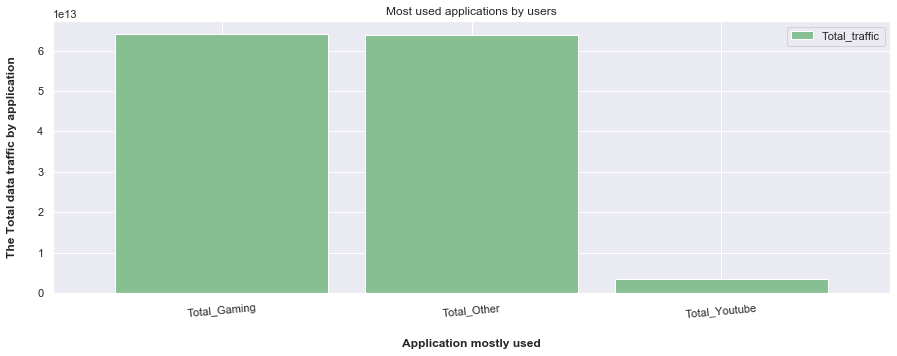

In [121]:
agg_totalDV_app_top = total_traffic_per_application.agg({'Total_SocialMedia':sum,'Total_Google':sum,
                                          'Total_Email':sum,'Total_Youtube':sum,
                                          'Total_Other':sum,'Total_Gaming':sum,
                                          'Total_Netflix':sum})
agg_totalDV_app_top = pd.DataFrame(agg_totalDV_app_top)
agg_totalDV_app_top =agg_totalDV_app_top#.reset_index()
agg_totalDV_app_top.columns = ["Total_traffic"] #"App used",
agg_totalDV_app_top = agg_totalDV_app_top.sort_values(by = "Total_traffic", ascending  = False)
agg_totalDV_app_top = agg_totalDV_app_top[:3]
agg_totalDV_app_top
ax = agg_totalDV_app_top.plot(kind='bar', figsize=(15, 5), color='#86BF91', zorder=2, width=0.85)
# Set x-axis label
ax.set_xlabel("Application mostly used", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("The Total data traffic by application", labelpad=20, weight='bold', size=12)
plt.title("Most used applications by users")
plt.xticks(rotation = 5)
plt.savefig("top3_most_used_applications.png")
plt.show()    

### Finding optimized value of k

In [122]:
data = user_df2_merge[['XDR_sessions', 'Session_Duration_hrs', 'Total_DV_GB']]

In [124]:
mms = MinMaxScaler()
mms.fit(data)
data_transform = mms.transform(data)

sum_squared_distance = []
K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean = kmean.fit(data_transform)
    sum_squared_distance.append(kmean.inertia_)

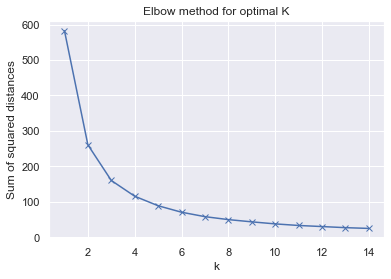

In [125]:
plt.plot(K,  sum_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
# plt.savefig('elbow_method_optimal_k.png')

plt.show()

# Objective : User Experience Analysis

# Task 3.1

In [126]:
df_user

,Bearer Id,MSISDN/Number,Start ms,End ms,Dur. (ms).1,Avg_RTT_DL_ms,Avg_RTT_UL_ms,Avg_TP_DL_kbps,Avg_TP_UL_kbps,TCP_DL_Retrans_Bytes,...,Total_Avg_TP_kbps,Total_TCP_Retrans_Bytes,Total_SocialMedia,Total_Google,Total_Email,Total_Youtube,Total_Netflix,Total_Gaming,Total_Other,Total_DV
0,13114483460844900352,3.366496e+10,770.0,662.0,1.823653e+09,42.000000,5.000000,23.0,44.0,2.080991e+07,...,67.0,2.156957e+07,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,13114483482878900224,3.368185e+10,235.0,606.0,1.365104e+09,65.000000,5.000000,16.0,26.0,2.080991e+07,...,42.0,2.156957e+07,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,13114483484080500736,3.376063e+10,1.0,652.0,1.361763e+09,109.795706,17.662883,6.0,9.0,2.080991e+07,...,15.0,2.156957e+07,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,13114483485442799616,3.375034e+10,486.0,171.0,1.321510e+09,109.795706,17.662883,44.0,44.0,2.080991e+07,...,88.0,2.156957e+07,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,13114483499480700928,3.369980e+10,565.0,954.0,1.089009e+09,109.795706,17.662883,6.0,9.0,2.080991e+07,...,15.0,2.156957e+07,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,13042425979329300480,3.366865e+10,615.0,407.0,5.958779e+07,313.000000,9.000000,63420.0,1393.0,1.655285e+07,...,64813.0,1.671546e+07,993175.0,1265634.0,4280107.0,24553645.0,29618711.0,797160102.0,336273648.0,872761860.0
149996,7277825670196679680,3.365069e+10,451.0,214.0,8.123076e+07,32.000000,0.000000,52.0,65.0,2.080991e+07,...,117.0,2.156957e+07,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0,631804110.0
149997,7349883264234609664,3.366345e+10,483.0,187.0,9.797070e+07,27.000000,2.000000,23.0,54.0,2.080991e+07,...,77.0,2.156957e+07,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0,705783925.0
149998,13114483573367300096,3.362189e+10,283.0,810.0,9.824953e+07,43.000000,6.000000,43.0,47.0,2.080991e+07,...,90.0,2.156957e+07,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0,627698629.0


In [127]:
experience_df = df_user[['MSISDN/Number', 'Total_Avg_RTT_ms', 'Total_Avg_TP_kbps','Total_TCP_Retrans_Bytes',
                        'Handset Type']]

In [128]:
experience_df.eval('Total_TCP_Retrans_GB = Total_TCP_Retrans_Bytes /  1000000000', inplace=True)

In [129]:
experience_df2 = experience_df[['MSISDN/Number', 'Total_Avg_RTT_ms', 'Total_Avg_TP_kbps','Total_TCP_Retrans_GB',
                        'Handset Type']]
experience_df2

,MSISDN/Number,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Total_TCP_Retrans_GB,Handset Type
0,3.366496e+10,47.000000,67.0,0.021570,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,70.000000,42.0,0.021570,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,127.458589,15.0,0.021570,Samsung Galaxy A8 (2018)
3,3.375034e+10,127.458589,88.0,0.021570,undefined
4,3.369980e+10,127.458589,15.0,0.021570,Samsung Sm-G390F
...,...,...,...,...,...
149995,3.366865e+10,322.000000,64813.0,0.016715,undefined
149996,3.365069e+10,32.000000,117.0,0.021570,Apple iPhone 8 Plus (A1897)
149997,3.366345e+10,29.000000,77.0,0.021570,Apple iPhone Se (A1723)
149998,3.362189e+10,49.000000,90.0,0.021570,Apple iPhone Xs (A2097)


In [164]:
agg_experience_df = experience_df2.groupby(['MSISDN/Number']).agg({'Total_TCP_Retrans_GB': [sum],'Total_Avg_RTT_ms': [sum],
                                                     'Total_Avg_TP_kbps': [sum], 'Handset Type': 'count'})
agg_experience_df.columns = ['Total_TCP_Retrans_GB','Total_Avg_RTT_ms','Total_Avg_TP_kbps', 'Handset Type']
agg_experience_df = agg_experience_df.reset_index()
agg_experience_df

,MSISDN/Number,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type
0,3.360100e+10,0.021570,46.000000,76.0,1
1,3.360100e+10,0.021570,31.000000,99.0,1
2,3.360100e+10,0.021570,127.458589,97.0,1
3,3.360101e+10,0.000761,84.000000,248.0,1
4,3.360101e+10,0.030940,119.000000,56844.0,2
...,...,...,...,...,...
106851,3.379000e+10,0.000218,52.000000,10365.0,1
106852,3.379000e+10,0.021570,40.000000,116.0,1
106853,3.197021e+12,0.021570,127.458589,1.0,1
106854,3.370000e+14,0.021570,127.458589,33.0,1


In [131]:
TCP_Values = agg_experience_df.sort_values(by='Total_TCP_Retrans_GB', ascending=False)
TCP_values = TCP_Values["Total_TCP_Retrans_GB"]
# Top
Top_TCP = TCP_values[:10]
Top_TCP = pd.DataFrame(Top_TCP)
Top_TCP.columns = ["Top_TCP_values"]
Top_TCP = Top_TCP.reset_index(drop = True)

print("The top 10 TCP Retrans values")
print("----------------------------------------")
print(Top_TCP)

# Bottom
Bottom_TCP = TCP_values.tail(10)
Bottom_TCP = pd.DataFrame(Bottom_TCP)
Bottom_TCP.columns = ["Bottom_TCP_Values"]
Bottom_TCP = Bottom_TCP.reset_index(drop = True)

print("\nThe bottom 10 TCP Retrans values")
print("----------------------------------------")
print(Bottom_TCP)

# Most frequent
TCP_frequent = agg_experience_df['Total_TCP_Retrans_GB'].value_counts()
TCP_frequent = TCP_frequent.head(10)
TCP_frequent = pd.DataFrame(TCP_frequent)
TCP_frequent.columns = ["TCP_frequent"]
TCP_frequent = TCP_frequent.reset_index(drop = True)


print("\nTCP Retrans most frequently used values")
print("----------------------------------------")
print(TCP_frequent)

The top 10 TCP Retrans values
----------------------------------------
   Top_TCP_values
0        8.354209
1        7.941860
2        7.374899
3        6.043978
4        5.879989
5        5.593366
6        5.566929
7        5.195785
8        5.179459
9        5.165857

The bottom 10 TCP Retrans values
----------------------------------------
   Bottom_TCP_Values
0       1.820000e-07
1       1.790000e-07
2       1.770000e-07
3       1.760000e-07
4       1.760000e-07
5       1.430000e-07
6       1.340000e-07
7       1.290000e-07
8       1.280000e-07
9       9.700000e-08

TCP Retrans most frequently used values
----------------------------------------
   TCP_frequent
0         47125
1          7468
2          1032
3           363
4           252
5           167
6           145
7            82
8            81
9            78


In [132]:
RTT_Values = agg_experience_df.sort_values(by='Total_Avg_RTT_ms', ascending=False)
RTT_values = RTT_Values["Total_Avg_RTT_ms"]
# Top
Top_RTT = RTT_values[:10]
Top_RTT = pd.DataFrame(Top_RTT)
Top_RTT.columns = ["Top_RTT_values"]
Top_RTT = Top_RTT.reset_index(drop = True)

print("The top 10 Average RTT values (ms)")
print("----------------------------------------")
print(Top_RTT)

# Bottom
Bottom_RTT = RTT_values.tail(10)
Bottom_RTT = pd.DataFrame(Bottom_RTT)
Bottom_RTT.columns = ["Bottom_RTT_Values"]
Bottom_RTT = Bottom_RTT.reset_index(drop = True)

print("\nThe bottom 10 Average RTT values (ms)")
print("----------------------------------------")
print(Bottom_RTT)

# Most frequent
RTT_frequent = agg_experience_df['Total_Avg_RTT_ms'].value_counts()
RTT_frequent = TCP_frequent.head(10)
RTT_frequent = pd.DataFrame(RTT_frequent)
RTT_frequent.columns = ["RTT_frequent"]
RTT_frequent = RTT_frequent.reset_index(drop = True)


print("\nAverage RTT most frequently used values")
print("----------------------------------------")
print(RTT_frequent)

The top 10 Average RTT values (ms)
----------------------------------------
   Top_RTT_values
0         96924.0
1         64670.0
2         54848.0
3         46021.0
4         37084.0
5         36304.0
6         27278.0
7         26300.0
8         25715.0
9         25388.0

The bottom 10 Average RTT values (ms)
----------------------------------------
   Bottom_RTT_Values
0               10.0
1                9.0
2                9.0
3                8.0
4                6.0
5                5.0
6                4.0
7                2.0
8                0.0
9                0.0

Average RTT most frequently used values
----------------------------------------
   RTT_frequent
0         47125
1          7468
2          1032
3           363
4           252
5           167
6           145
7            82
8            81
9            78


In [133]:
Avg_TP_Values = agg_experience_df.sort_values(by='Total_Avg_TP_kbps', ascending=False)
Avg_TP_Values = RTT_Values["Total_Avg_TP_kbps"]
# Top
Top_Avg_TP = Avg_TP_Values[:10]
Top_Avg_TP = pd.DataFrame(Top_Avg_TP)
Top_Avg_TP.columns = ["Top_Avg_TP_values"]
Top_Avg_TP = Top_Avg_TP.reset_index(drop = True)

print("The top 10 Average TP values (kbps)")
print("----------------------------------------")
print(Top_Avg_TP)

# Bottom
Bottom_Avg_TP = Avg_TP_Values.tail(10)
Bottom_Avg_TP = pd.DataFrame(Bottom_Avg_TP)
Bottom_Avg_TP.columns = ["Bottom_Av_TP_Values"]
Bottom_Avg_TP = Bottom_Avg_TP.reset_index(drop = True)

print("\nThe bottom 10 Average TP values (kbps)")
print("----------------------------------------")
print(Bottom_Avg_TP)

# Most frequent
Av_TP_frequent = agg_experience_df['Total_Avg_TP_kbps'].value_counts()
Av_TP_frequent = Av_TP_frequent.head(10)
Av_TP_frequent = pd.DataFrame(Av_TP_frequent)
Av_TP_frequent.columns = ["Av_TP_frequent"]
Av_TP_frequent = Av_TP_frequent.reset_index(drop = True)


print("\nAverage TP most frequently used values")
print("----------------------------------------")
print(Av_TP_frequent)

The top 10 Average TP values (kbps)
----------------------------------------
   Top_Avg_TP_values
0                3.0
1              194.0
2               21.0
3              303.0
4            21200.0
5              108.0
6             5148.0
7              144.0
8               71.0
9             1608.0

The bottom 10 Average TP values (kbps)
----------------------------------------
   Bottom_Av_TP_Values
0                 93.0
1                 91.0
2                113.0
3                110.0
4                101.0
5                 78.0
6                121.0
7                113.0
8                 85.0
9                100.0

Average TP most frequently used values
----------------------------------------
   Av_TP_frequent
0            2685
1            2072
2            1023
3            1005
4             971
5             866
6             853
7             817
8             798
9             793


In [134]:
combined_df = pd.concat([Top_TCP,Bottom_TCP,TCP_frequent,Top_RTT,Bottom_RTT,RTT_frequent, 
                         Top_Avg_TP,Bottom_Avg_TP,Av_TP_frequent],axis = 1)

In [135]:
combined_df

,Top_TCP_values,Bottom_TCP_Values,TCP_frequent,Top_RTT_values,Bottom_RTT_Values,RTT_frequent,Top_Avg_TP_values,Bottom_Av_TP_Values,Av_TP_frequent
0,8.354209,1.820000e-07,47125,96924.0,10.0,47125,3.0,93.0,2685
1,7.941860,1.790000e-07,7468,64670.0,9.0,7468,194.0,91.0,2072
2,7.374899,1.770000e-07,1032,54848.0,9.0,1032,21.0,113.0,1023
3,6.043978,1.760000e-07,363,46021.0,8.0,363,303.0,110.0,1005
4,5.879989,1.760000e-07,252,37084.0,6.0,252,21200.0,101.0,971
5,5.593366,1.430000e-07,167,36304.0,5.0,167,108.0,78.0,866
6,5.566929,1.340000e-07,145,27278.0,4.0,145,5148.0,121.0,853
7,5.195785,1.290000e-07,82,26300.0,2.0,82,144.0,113.0,817
8,5.179459,1.280000e-07,81,25715.0,0.0,81,71.0,85.0,798
9,5.165857,9.700000e-08,78,25388.0,0.0,78,1608.0,100.0,793


In [136]:
dfi.export(combined_df, 'top10_list_user_experience_metrics.png')

# Task 3.3

### Average throughput per handset type

In [157]:
clean_handset_type = df_user[df_user["Handset Type"] != "undefined"]
TP_per_handset_type = clean_handset_type.groupby(["Handset Type"]).agg({"Total_Avg_TP_kbps": [sum]})
TP_per_handset_type.columns = ["Avg_Throughput_per_handset"]
TP_per_handset_type = TP_per_handset_type.sort_values(by="Avg_Throughput_per_handset", ascending=False)
top10_avg_tp_per_handset = TP_per_handset_type[:10]

In [158]:
top10_avg_tp_per_handset

,Avg_Throughput_per_handset
Handset Type,
Huawei B528S-23A,832626680.0
Apple iPhone 7 (A1778),76769459.0
Apple iPhone 6S (A1688),74118773.0
Apple iPhone 6 (A1586),68596814.0
Huawei E5180,64208823.0
Apple iPhone Xr (A2105),62367607.0
Samsung Galaxy S8 (Sm-G950F),62194400.0
Apple iPhone 8 (A1905),57739501.0
Apple iPhone X (A1901),56920948.0


In [159]:
#dfi.export(top10_avg_tp_per_handset, 'top10_avg_tp_per_handset.png')

### Average TCP transmission per handset type

In [160]:
clean_handset_type.eval("Total_TCP_Retrans_GB = Total_TCP_Retrans_Bytes /  1000000000", inplace=True)

TCP_Retrans_per_handset_type = clean_handset_type.groupby(["Handset Type"]).agg({"Total_TCP_Retrans_GB": [sum]})
TCP_Retrans_per_handset_type.columns = ["Total_TCP_Retrans_per_handset (GB)"]
TCP_Retrans_per_handset_type = TCP_Retrans_per_handset_type.sort_values(by="Total_TCP_Retrans_per_handset (GB)", ascending=False)
top10_TCP_transmission = TCP_Retrans_per_handset_type[:10]

In [161]:
top10_TCP_transmission

,Total_TCP_Retrans_per_handset (GB)
Handset Type,
Huawei B528S-23A,1087.148285
Apple iPhone 6S (A1688),171.730174
Apple iPhone 6 (A1586),152.307872
Apple iPhone 7 (A1778),105.097515
Apple iPhone Se (A1723),91.974890
Apple iPhone 8 (A1905),86.923931
Apple iPhone Xr (A2105),84.041657
Samsung Galaxy S8 (Sm-G950F),69.043293
Huawei E5180,67.631908


In [162]:
#dfi.export(top10_TCP_transmission, 'top10_TCP_transmission.png')

### K-means clustering

In [165]:
agg_experience_df

,MSISDN/Number,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type
0,3.360100e+10,0.021570,46.000000,76.0,1
1,3.360100e+10,0.021570,31.000000,99.0,1
2,3.360100e+10,0.021570,127.458589,97.0,1
3,3.360101e+10,0.000761,84.000000,248.0,1
4,3.360101e+10,0.030940,119.000000,56844.0,2
...,...,...,...,...,...
106851,3.379000e+10,0.000218,52.000000,10365.0,1
106852,3.379000e+10,0.021570,40.000000,116.0,1
106853,3.197021e+12,0.021570,127.458589,1.0,1
106854,3.370000e+14,0.021570,127.458589,33.0,1


In [166]:
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=22)

In [168]:
experience_df3_predicted = kmeans3.fit_predict(agg_experience_df[['Total_Avg_RTT_ms', 'Total_Avg_TP_kbps', 'Total_TCP_Retrans_GB']])

In [169]:
experience_df3_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [170]:
agg_experience_df["Cluster"] = experience_df3_predicted

In [171]:
agg_experience_df

,MSISDN/Number,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type,Cluster
0,3.360100e+10,0.021570,46.000000,76.0,1,1
1,3.360100e+10,0.021570,31.000000,99.0,1,1
2,3.360100e+10,0.021570,127.458589,97.0,1,1
3,3.360101e+10,0.000761,84.000000,248.0,1,1
4,3.360101e+10,0.030940,119.000000,56844.0,2,0
...,...,...,...,...,...,...
106851,3.379000e+10,0.000218,52.000000,10365.0,1,1
106852,3.379000e+10,0.021570,40.000000,116.0,1,1
106853,3.197021e+12,0.021570,127.458589,1.0,1,1
106854,3.370000e+14,0.021570,127.458589,33.0,1,1


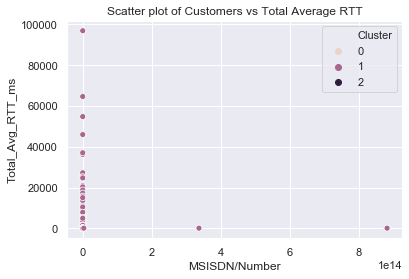

In [172]:
sns.scatterplot(x=agg_experience_df["MSISDN/Number"], y=agg_experience_df["Total_Avg_RTT_ms"], 
                hue=agg_experience_df["Cluster"])
plt.title("Scatter plot of Customers vs Total Average RTT")
plt.show()   

# Objective : User Satisfaction Analysis

## Task 4.1

In [173]:
# Getting the lowest cluster centers
Engagement_Low_Cluster = kmeans.cluster_centers_[0]
Exper_Low_Cluster = kmeans3.cluster_centers_[0]

In [174]:
# Finding the Eucalidean distance between the data points and the lowest cluster centers (Engagement score)
Engagement_Score = []
for row in user_df5[['XDR_sessions', 'Session_Duration_hrs', 'Total_DV_GB']].to_numpy():
    score = np.linalg.norm(row - Engagement_Low_Cluster)
    Engagement_Score.append(score)

In [175]:
# Finding the Eucalidena distance between the data points and the lowest custer centers (Experience score)
Experience_Score = []
for row in agg_experience_df[['Total_Avg_RTT_ms', 'Total_Avg_TP_kbps', 'Total_TCP_Retrans_GB']].to_numpy():
    score = np.linalg.norm(row - Exper_Low_Cluster)
    Experience_Score.append(score)

In [176]:
# adding the engagement score to engagement analysis dataframe
user_df5['Engagement Score'] = np.transpose(np.array(Engagement_Score))

In [177]:
user_df5

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB,Engagement Score
0,3.360100e+10,0.000000,0.005908,0.095931,67062.455208
1,3.360100e+10,0.000000,0.009387,0.014026,67062.451729
2,3.360100e+10,0.000000,0.006892,0.063851,67062.454224
3,3.360101e+10,0.000000,0.002304,0.044148,67062.458812
4,3.360101e+10,0.058824,0.001615,0.161598,67062.459340
...,...,...,...,...,...
106851,3.379000e+10,0.000000,0.000090,0.077317,67062.461026
106852,3.379000e+10,0.000000,0.007217,0.050727,67062.453899
106853,3.197021e+12,0.000000,0.046922,0.022566,67062.414194
106854,3.370000e+14,0.000000,0.013258,0.063887,67062.447858


In [178]:
# adding the experience score to experience analysis dataframe
agg_experience_df['Experience Score'] = np.transpose(np.array(Experience_Score))

In [180]:
agg_experience_df2 = agg_experience_df.drop(columns=['Cluster'])

In [181]:
agg_experience_df2

,MSISDN/Number,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type,Experience Score
0,3.360100e+10,0.021570,46.000000,76.0,1,66986.351614
1,3.360100e+10,0.021570,31.000000,99.0,1,66963.384002
2,3.360100e+10,0.021570,127.458589,97.0,1,66965.234708
3,3.360101e+10,0.000761,84.000000,248.0,1,66814.284936
4,3.360101e+10,0.030940,119.000000,56844.0,2,10218.411401
...,...,...,...,...,...,...
106851,3.379000e+10,0.000218,52.000000,10365.0,1,56697.362823
106852,3.379000e+10,0.021570,40.000000,116.0,1,66946.364233
106853,3.197021e+12,0.021570,127.458589,1.0,1,67061.234675
106854,3.370000e+14,0.021570,127.458589,33.0,1,67029.234686


In [182]:
satisfaction_df = pd.merge(user_df5, agg_experience_df2, on='MSISDN/Number')

In [183]:
satisfaction_df

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB,Engagement Score,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type,Experience Score
0,3.360100e+10,0.000000,0.005908,0.095931,67062.455208,0.021570,46.000000,76.0,1,66986.351614
1,3.360100e+10,0.000000,0.009387,0.014026,67062.451729,0.021570,31.000000,99.0,1,66963.384002
2,3.360100e+10,0.000000,0.006892,0.063851,67062.454224,0.021570,127.458589,97.0,1,66965.234708
3,3.360101e+10,0.000000,0.002304,0.044148,67062.458812,0.000761,84.000000,248.0,1,66814.284936
4,3.360101e+10,0.058824,0.001615,0.161598,67062.459340,0.030940,119.000000,56844.0,2,10218.411401
...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,0.000000,0.000090,0.077317,67062.461026,0.000218,52.000000,10365.0,1,56697.362823
106852,3.379000e+10,0.000000,0.007217,0.050727,67062.453899,0.021570,40.000000,116.0,1,66946.364233
106853,3.197021e+12,0.000000,0.046922,0.022566,67062.414194,0.021570,127.458589,1.0,1,67061.234675
106854,3.370000e+14,0.000000,0.013258,0.063887,67062.447858,0.021570,127.458589,33.0,1,67029.234686


In [184]:
# Averaging the engagement and the experience score to find the satisfaction score
satisfaction_df['Satisfaction Score'] = satisfaction_df['Engagement Score'] + satisfaction_df['Experience Score']


In [185]:
satisfaction_df['Satisfaction Score'] = satisfaction_df['Satisfaction Score']/2

In [186]:
satisfaction_df

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB,Engagement Score,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type,Experience Score,Satisfaction Score
0,3.360100e+10,0.000000,0.005908,0.095931,67062.455208,0.021570,46.000000,76.0,1,66986.351614,67024.403411
1,3.360100e+10,0.000000,0.009387,0.014026,67062.451729,0.021570,31.000000,99.0,1,66963.384002,67012.917865
2,3.360100e+10,0.000000,0.006892,0.063851,67062.454224,0.021570,127.458589,97.0,1,66965.234708,67013.844466
3,3.360101e+10,0.000000,0.002304,0.044148,67062.458812,0.000761,84.000000,248.0,1,66814.284936,66938.371874
4,3.360101e+10,0.058824,0.001615,0.161598,67062.459340,0.030940,119.000000,56844.0,2,10218.411401,38640.435370
...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,0.000000,0.000090,0.077317,67062.461026,0.000218,52.000000,10365.0,1,56697.362823,61879.911924
106852,3.379000e+10,0.000000,0.007217,0.050727,67062.453899,0.021570,40.000000,116.0,1,66946.364233,67004.409066
106853,3.197021e+12,0.000000,0.046922,0.022566,67062.414194,0.021570,127.458589,1.0,1,67061.234675,67061.824434
106854,3.370000e+14,0.000000,0.013258,0.063887,67062.447858,0.021570,127.458589,33.0,1,67029.234686,67045.841272


In [187]:
satisfied_cust = satisfaction_df.sort_values(by='Satisfaction Score', ascending=False)

In [189]:
top10_satisfied_cust = satisfied_cust[:10]

In [191]:
top10_satisfied_cust = top10_satisfied_cust[['MSISDN/Number', 'Satisfaction Score']]

In [192]:
top10_satisfied_cust

,MSISDN/Number,Satisfaction Score
97584,3.376233e+10,451111.055092
69910,3.366871e+10,420212.147813
36257,3.365955e+10,399171.126948
73146,3.366995e+10,345407.629487
69020,3.366843e+10,338429.132198
84486,3.369817e+10,309398.638447
13141,3.362570e+10,282089.719072
29313,3.365808e+10,275176.189222
98213,3.376264e+10,274834.325603
60763,3.366566e+10,265176.621319


In [202]:
dfi.export(top10_satisfied_cust, 'top10_satisfied_customers.png')

### K-means clustering on engagement and experience score

In [193]:
kmeans4 = KMeans(n_clusters=2, init='k-means++', random_state=22)

In [194]:
enge_exp_predicted = kmeans4.fit_predict(satisfaction_df[['Engagement Score', 'Experience Score']])

In [195]:
enge_exp_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [196]:
satisfaction_df['cluster_class'] = enge_exp_predicted

In [197]:
satisfaction_df

,MSISDN/Number,XDR_sessions,Session_Duration_hrs,Total_DV_GB,Engagement Score,Total_TCP_Retrans_GB,Total_Avg_RTT_ms,Total_Avg_TP_kbps,Handset Type,Experience Score,Satisfaction Score,cluster_class
0,3.360100e+10,0.000000,0.005908,0.095931,67062.455208,0.021570,46.000000,76.0,1,66986.351614,67024.403411,1
1,3.360100e+10,0.000000,0.009387,0.014026,67062.451729,0.021570,31.000000,99.0,1,66963.384002,67012.917865,1
2,3.360100e+10,0.000000,0.006892,0.063851,67062.454224,0.021570,127.458589,97.0,1,66965.234708,67013.844466,1
3,3.360101e+10,0.000000,0.002304,0.044148,67062.458812,0.000761,84.000000,248.0,1,66814.284936,66938.371874,1
4,3.360101e+10,0.058824,0.001615,0.161598,67062.459340,0.030940,119.000000,56844.0,2,10218.411401,38640.435370,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,0.000000,0.000090,0.077317,67062.461026,0.000218,52.000000,10365.0,1,56697.362823,61879.911924,1
106852,3.379000e+10,0.000000,0.007217,0.050727,67062.453899,0.021570,40.000000,116.0,1,66946.364233,67004.409066,1
106853,3.197021e+12,0.000000,0.046922,0.022566,67062.414194,0.021570,127.458589,1.0,1,67061.234675,67061.824434,1
106854,3.370000e+14,0.000000,0.013258,0.063887,67062.447858,0.021570,127.458589,33.0,1,67029.234686,67045.841272,1


### Aggregating the average satisfaction and experience scores per clusters

In [208]:
satisf_expr_aggr = satisfaction_df['cluster_class'].agg({'Satisfaction Score': ['mean'],
                                                         'Experience Score': ['mean']})

In [209]:
satisf_expr_aggr

Satisfaction Score  mean    0.758292
Experience Score    mean    0.758292
Name: cluster_class, dtype: float64

In [200]:
export_table = satisfaction_df[['MSISDN/Number', 'Engagement Score', 'Experience Score', 'Satisfaction Score']]

In [201]:
export_table

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,67062.455208,66986.351614,67024.403411
1,3.360100e+10,67062.451729,66963.384002,67012.917865
2,3.360100e+10,67062.454224,66965.234708,67013.844466
3,3.360101e+10,67062.458812,66814.284936,66938.371874
4,3.360101e+10,67062.459340,10218.411401,38640.435370
...,...,...,...,...
106851,3.379000e+10,67062.461026,56697.362823,61879.911924
106852,3.379000e+10,67062.453899,66946.364233,67004.409066
106853,3.197021e+12,67062.414194,67061.234675,67061.824434
106854,3.370000e+14,67062.447858,67029.234686,67045.841272
